<a id="section-1"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:150%;text-align:center;border-radius:10px 10px;">Toward Early Detection of Parkinson's Disease: Integrating Novel Proteomic Biomarkers for Predictive Analysis</p>

##### Analysis by Joan Jaylani
Data downloaded with permission from Parkinson's Progression Markers Initiative (PPMI) <br>
https://www.ppmi-info.org/<br>
June 1, 2025

<a id="section-1"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">1. Introduction</p>

#### This study investigates the predictive utility of proteomic biomarkers for identifying individuals at risk for Parkinson’s disease Datasets were obtained from the Parkinson's Progression Markers Initiative (PPMI), integrating both protein and peptide expression values derived from biospecimen assays

#### PPMI is a global observation study that researches biomarkers for Parkinson’s Disease and related neurological disorders. The PPMI has the largest collection of images, clinical research, and biological specimens in the world and has research conducted in the United States, Europe, Israel, and Australia. The data is available upon approval to academic and industry researchers.¶

<a id="section-3"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">2. Objective</p>

#### The project explores predictive biomarkers for Parkinson's disease, aiming to enable earlier intervention, potentially before clinical symptoms emerge, to slow disease progression and significantly enhance the quality of life for diagnosed individuals, to surpass what current methods allow.

<a id="section-3"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">3. Importing Libraries</p>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scipy import stats

<a id="section-4"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">4. Loading the Dataset</p>

#### Note: This data originated from the PPMI Biospecimen_Analysis_Results.csv but was significantly preprocessed in a prior notebook to pivot the data, analyze, and remove rows and columns with > 20% missing data, remove columns unrelated to this analysis, and impute missing values with the mean values.

In [5]:
#Loading the dataset
BIO_df = pd.read_csv("filtered_BIO_pivot_df.csv")

<a id="section-5"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px">5. Data Exploration </p>

In [8]:
print('Blood Biomarkers for PD dataframe shape:  ', BIO_df.shape)

Blood Biomarkers for PD dataframe shape:   (192, 735)


In [10]:
BIO_df.head()

,24(S)-hydroxycholesterol,3-Hydroxykynurenine,7a-Hydroxy-3-oxocholest-4-enoic_acid,"7a-Hydroxy-3-oxocholest-4-enoic_acid+3b,_7a-dihydroxycholest-5-enoic_acid",A1AT_HUMAN|LSITGTYDLK|y6+,A1AT_HUMAN|LSITGTYDLK|y7+,A1AT_HUMAN|SVLGQLGITK|y7+,A1AT_HUMAN|SVLGQLGITK|y8+,A1BG_HUMAN|NGVAQEPVHLDSPAIK|b3+,A1BG_HUMAN|NGVAQEPVHLDSPAIK|y5+,...,VIME_HUMAN|ILLAELEQLK|y8+,VTDB_HUMAN|EFSHLGK|y3+,VTDB_HUMAN|EFSHLGK|y5+,VTDB_HUMAN|HLSLLTTLSNR|b2+,VTDB_HUMAN|HLSLLTTLSNR|y7+,Valine,d4-5HT,hemoglobin,p-Tau,PD_LABEL
0,12.67,15.00015,36.01,41.60,0.0008,0.0007,0.0009,0.0006,0.1747,0.1388,...,0.0353,0.4451,0.8723,1.3090,1.3211,92.416824,273.279215,13452.73,29.61,0
1,19.36,10.74075,80.61,82.98,0.0010,0.0008,0.0010,0.0007,0.3032,0.2869,...,0.0135,0.5615,0.4929,1.3220,1.2252,131.572166,241.875345,75986.90,4.30,1
2,14.47,22.44035,29.07,29.46,0.0005,0.0005,0.0007,0.0006,0.1203,0.0917,...,0.0126,0.3319,0.3291,0.3211,0.7047,118.436706,249.966309,52320.70,6.26,1
3,25.06,14.43905,23.29,26.38,0.0007,0.0004,0.0007,0.0011,0.0878,0.0677,...,0.0168,0.1273,0.2604,0.2621,0.3516,106.645881,232.547542,21113.96,36.84,1
4,19.76,5.87415,18.79,20.94,0.0009,0.0010,0.0009,0.0011,0.0867,0.0791,...,0.0202,0.2848,0.3905,0.3337,0.3175,83.725148,221.523085,26032.55,13.20,0


In [12]:
print(BIO_df['PD_LABEL'].value_counts())

PD_LABEL
1    109
0     83
Name: count, dtype: int64


In [14]:
# Drop rows that have 10 or more NaN values
BIO_pivot_df_filtered = BIO_df.dropna(thresh=BIO_df.shape[1] - 9)


In [16]:
BIO_pivot_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 735 entries, 24(S)-hydroxycholesterol to PD_LABEL
dtypes: float64(734), int64(1)
memory usage: 1.1 MB


In [18]:
# Total missing values per column
missing_count = BIO_df.isnull().sum()

# Percentage of missing values per column
missing_percent = BIO_df.isnull().mean() * 100

# Combine into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent
})

# Sort by highest percentage missing
missing_summary = missing_summary.sort_values(by='Missing Percentage', ascending=False)

# Display top rows
print(missing_summary.head(100))  # You can increase the number if needed


                                     Missing Count  Missing Percentage
24(S)-hydroxycholesterol                         0                 0.0
LRC4B_HUMAN|LTTVPTQAFEYLSK|y6+                   0                 0.0
LRP11_HUMAN|AGQDVVLHLPTDGVVLDGR|b8+              0                 0.0
LRP11_HUMAN|AGQDVVLHLPTDGVVLDGR|y7+              0                 0.0
LYSC_HUMAN|ATNYNAGDR|y5+                         0                 0.0
...                                            ...                 ...
HBA_HUMAN|TYFPHFDLSHGSAQVK|y3+                   0                 0.0
HBB_HUMAN|EFTPPVQAAYQK|y6+                       0                 0.0
HBB_HUMAN|EFTPPVQAAYQK|y8+                       0                 0.0
HBB_HUMAN|SAVTALWGK|y3+                          0                 0.0
HBB_HUMAN|SAVTALWGK|y7+                          0                 0.0

[100 rows x 2 columns]


In [20]:
print("Any NaNs?", BIO_df.isnull().values.any())


Any NaNs? False


<a id="section-6"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">6. Partitioning Data and Exploring Features</p>

In [23]:
from sklearn.model_selection import train_test_split

X = BIO_df.drop(columns=['PD_LABEL'])
y = BIO_df['PD_LABEL']

# Stratified split to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # 👈 this is the key fix
)


In [25]:
print("Overall class distribution:")
print(y.value_counts())

print("\nTrain set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


Overall class distribution:
PD_LABEL
1    109
0     83
Name: count, dtype: int64

Train set class distribution:
PD_LABEL
1    87
0    66
Name: count, dtype: int64

Test set class distribution:
PD_LABEL
1    22
0    17
Name: count, dtype: int64


In [27]:
BIO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 735 entries, 24(S)-hydroxycholesterol to PD_LABEL
dtypes: float64(734), int64(1)
memory usage: 1.1 MB


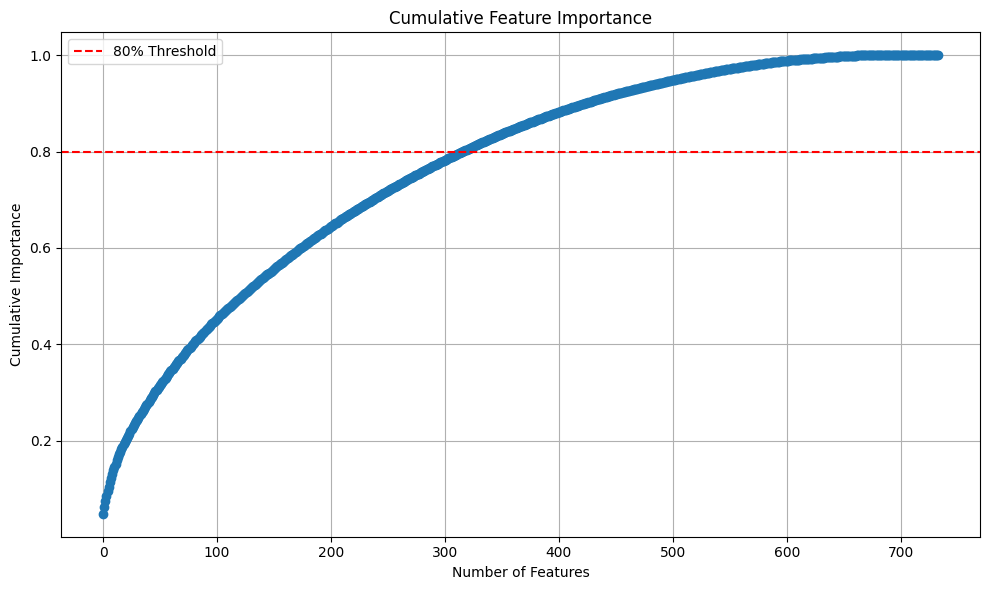

In [29]:
import matplotlib.pyplot as plt
import numpy as np


# Prepare the features and labels again
X = BIO_df.drop(columns=['PD_LABEL'])
y = BIO_df['PD_LABEL']


# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Sort importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Calculate cumulative importance
cumulative_importance = importances.cumsum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(cumulative_importance)), cumulative_importance.values, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Threshold')
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<a id="section-7"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">7. Model Selection and Evaluation</p>

### Comparison of 4 Models Using K-Fold, No Feature Selection

In [33]:
# ✅ Stratified train-test split
from sklearn.model_selection import train_test_split

X = BIO_df.drop(columns=['PD_LABEL'])
y = BIO_df['PD_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


🔍 Evaluating: LogisticRegression

🔍 Evaluating: SVC

🔍 Evaluating: RandomForest

🔍 Evaluating: XGBoost


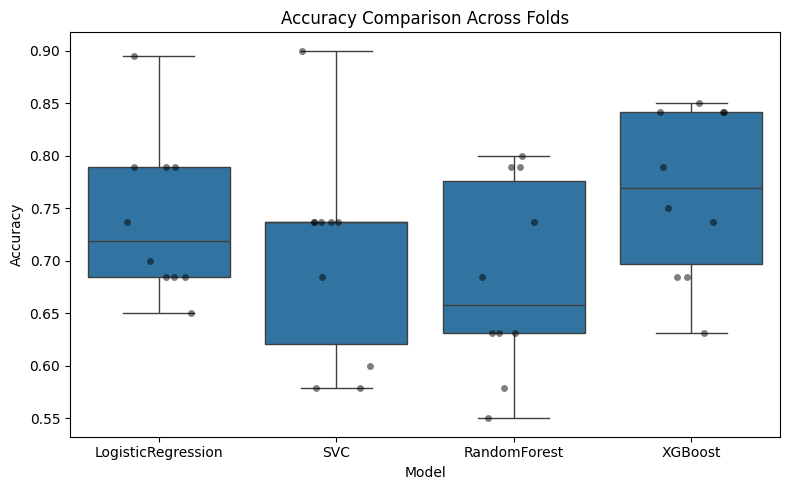

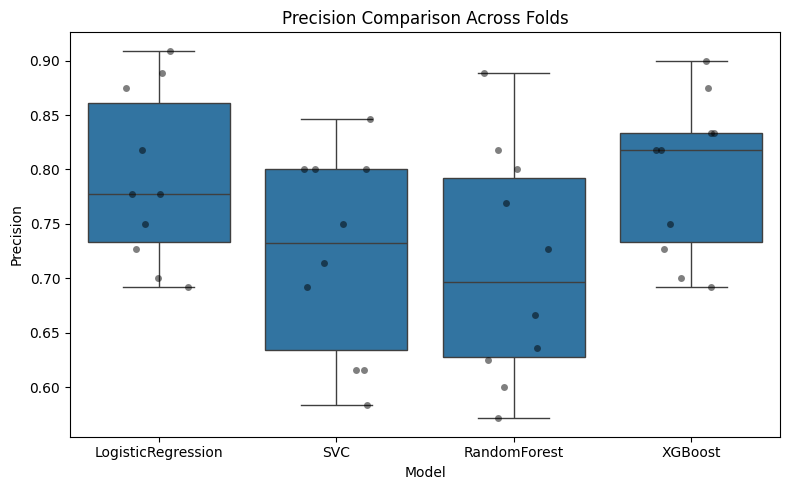

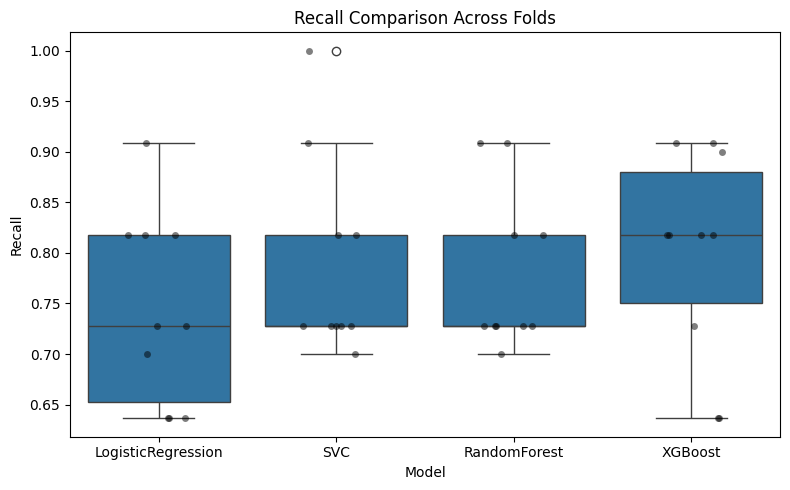

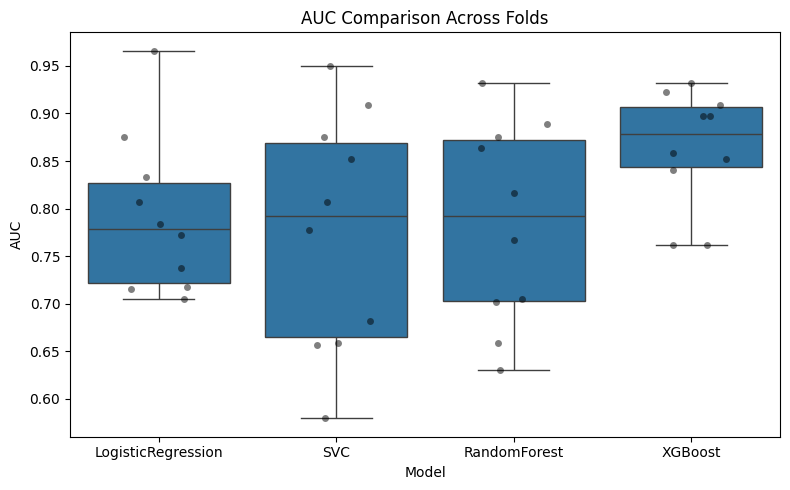


📈 Final Averaged Classification Reports and Confusion Matrices (All Folds Combined):

✅ LogisticRegression - Combined Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        83
           1       0.79      0.74      0.76       109

    accuracy                           0.74       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.74      0.74      0.74       192



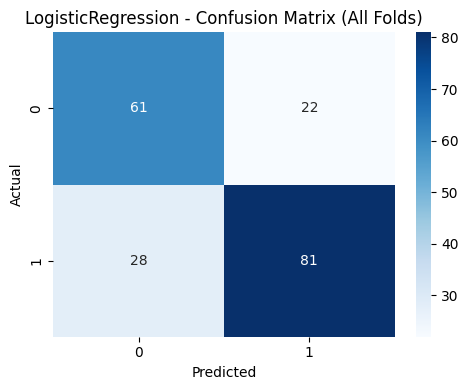


✅ SVC - Combined Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        83
           1       0.72      0.79      0.75       109

    accuracy                           0.70       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.70      0.70      0.70       192



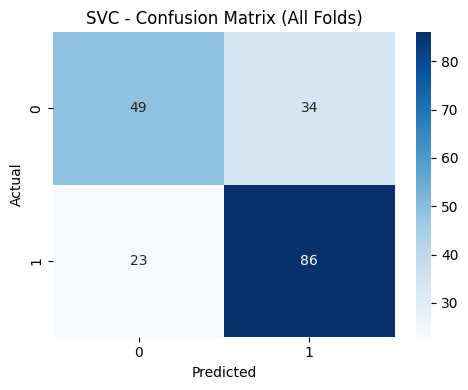


✅ RandomForest - Combined Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60        83
           1       0.70      0.78      0.74       109

    accuracy                           0.68       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.68      0.68      0.68       192



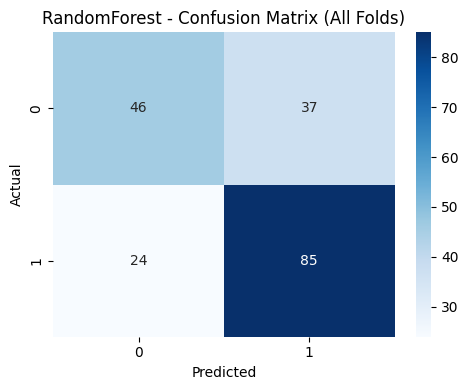


✅ XGBoost - Combined Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        83
           1       0.79      0.80      0.79       109

    accuracy                           0.77       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.77      0.77      0.77       192



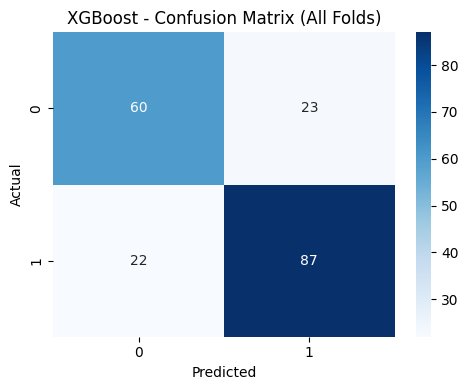


📊 Mean + 95% CI:

LogisticRegression
Accuracy: 0.740 (95% CI: 0.687 – 0.794)
Precision: 0.792 (95% CI: 0.735 – 0.848)
Recall: 0.743 (95% CI: 0.675 – 0.811)
AUC: 0.791 (95% CI: 0.732 – 0.850)

SVC
Accuracy: 0.703 (95% CI: 0.633 – 0.773)
Precision: 0.722 (95% CI: 0.655 – 0.788)
Recall: 0.788 (95% CI: 0.718 – 0.859)
AUC: 0.775 (95% CI: 0.686 – 0.864)

RandomForest
Accuracy: 0.682 (95% CI: 0.617 – 0.748)
Precision: 0.710 (95% CI: 0.634 – 0.786)
Recall: 0.779 (95% CI: 0.722 – 0.836)
AUC: 0.784 (95% CI: 0.708 – 0.860)

XGBoost
Accuracy: 0.765 (95% CI: 0.708 – 0.822)
Precision: 0.795 (95% CI: 0.743 – 0.847)
Recall: 0.799 (95% CI: 0.726 – 0.872)
AUC: 0.863 (95% CI: 0.819 – 0.907)


In [35]:
#UPDATED MODEL WITH CORRECT KFOLD, NO FEATURE SELECTION

# Set random seed
np.random.seed(42)

# 1. Use StratifiedKFold
n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 2. Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, C=1.0, solver='liblinear', random_state=42),
    "SVC": SVC(probability=True, kernel="rbf", C=1.0, gamma="scale", random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
}

def train_and_compare_models(X, y):
    all_scores = []

    # 🟢 Collect pooled predictions for final classification report
    all_y_true = {model_name: [] for model_name in models}
    all_y_pred = {model_name: [] for model_name in models}

    for model_name, model in models.items():
        print(f"\n🔍 Evaluating: {model_name}")
        fold_scores = []

        for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_prob = model.predict_proba(X_test_scaled)[:, 1]

            # 📊 Score metrics for this fold
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_prob)

            fold_scores.append({
                "Model": model_name,
                "Fold": fold,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "AUC": auc
            })

            # 🟢 Store pooled predictions
            all_y_true[model_name].extend(y_test)
            all_y_pred[model_name].extend(y_pred)

        model_df = pd.DataFrame(fold_scores)
        all_scores.append(model_df)

    # 3. Combine all results
    full_df = pd.concat(all_scores)

    # 4. Plot metrics across folds
    metrics = ["Accuracy", "Precision", "Recall", "AUC"]
    for metric in metrics:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=full_df, x="Model", y=metric)
        sns.stripplot(data=full_df, x="Model", y=metric, color="black", alpha=0.5, jitter=0.2)
        plt.title(f"{metric} Comparison Across Folds")
        plt.tight_layout()
        plt.show()

    # 5. Final classification reports & confusion matrices
    print("\n📈 Final Averaged Classification Reports and Confusion Matrices (All Folds Combined):")
    for model_name in models:
        print(f"\n✅ {model_name} - Combined Classification Report:")
        print(classification_report(all_y_true[model_name], all_y_pred[model_name]))

        # Confusion matrix
        cm = confusion_matrix(all_y_true[model_name], all_y_pred[model_name])
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_name} - Confusion Matrix (All Folds)")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

    # 6. Mean + 95% CI for all models
    print("\n📊 Mean + 95% CI:")
    for model_name in models:
        print(f"\n{model_name}")
        model_data = full_df[full_df["Model"] == model_name]
        for metric in metrics:
            mean = model_data[metric].mean()
            ci = stats.t.interval(
                0.95, df=n_splits - 1, loc=mean, scale=stats.sem(model_data[metric])
            )
            print(f"{metric}: {mean:.3f} (95% CI: {ci[0]:.3f} – {ci[1]:.3f})")


train_and_compare_models(X, y)


In [36]:
%matplotlib inline

### Top 30 Features Classification using Random Forest model

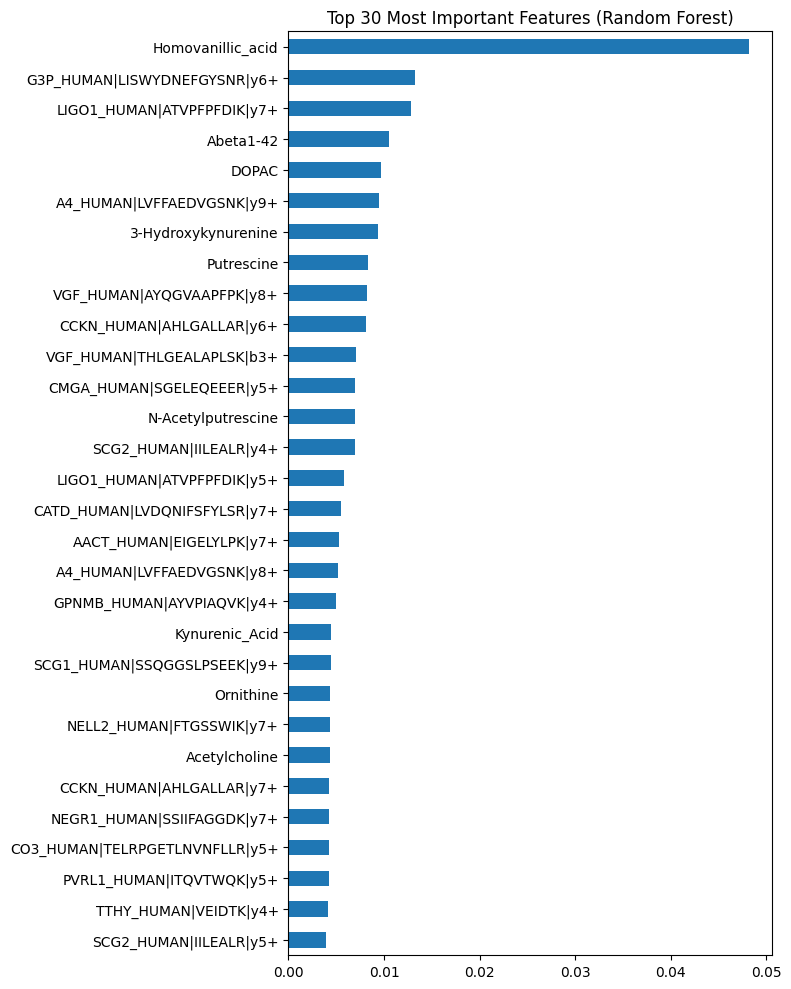

In [40]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define features and target
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# Step 2: Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X, y)

# Step 3: Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)

# Step 4: Sort and get top 30
top_features = importances.sort_values(ascending=False).head(30)

# Step 5: Plot top features
top_features.plot(kind="barh", figsize=(8, 10))
plt.title("Top 30 Most Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Top 30 Features Classification using XG Boost model

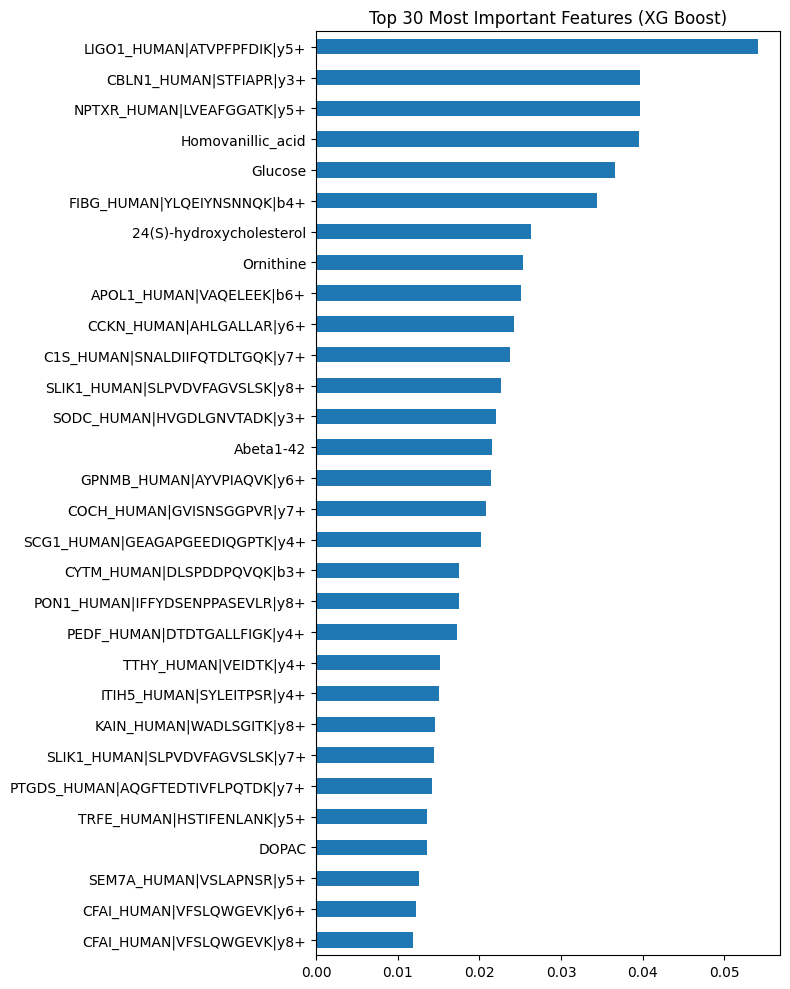

In [44]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define features and target
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# Step 2: Train the model
model = XGBClassifier(eval_metric="logloss", random_state=42)
model.fit(X, y)
   # top_features = pd.Series(xgb_selector.feature_importances_, index=X_train.columns)\
    #                .sort_values(ascending=False).head(25).index



# Step 3: Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)

# Step 4: Sort and get top 30
top_features = importances.sort_values(ascending=False).head(30)

# Step 5: Plot top features
top_features.plot(kind="barh", figsize=(8, 10))
plt.title("Top 30 Most Important Features (XG Boost)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### XG Boost and Random Forest Models Run, Using XG Boost Feature Selection, K-Fold (10)


 Random Forest - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        83
           1       0.79      0.83      0.81       109

    accuracy                           0.78       192
   macro avg       0.78      0.77      0.78       192
weighted avg       0.78      0.78      0.78       192


 XGBoost - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        83
           1       0.82      0.84      0.83       109

    accuracy                           0.81       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.81      0.81      0.81       192


AUC (Random Forest): 0.877
AUC (XGBoost): 0.878


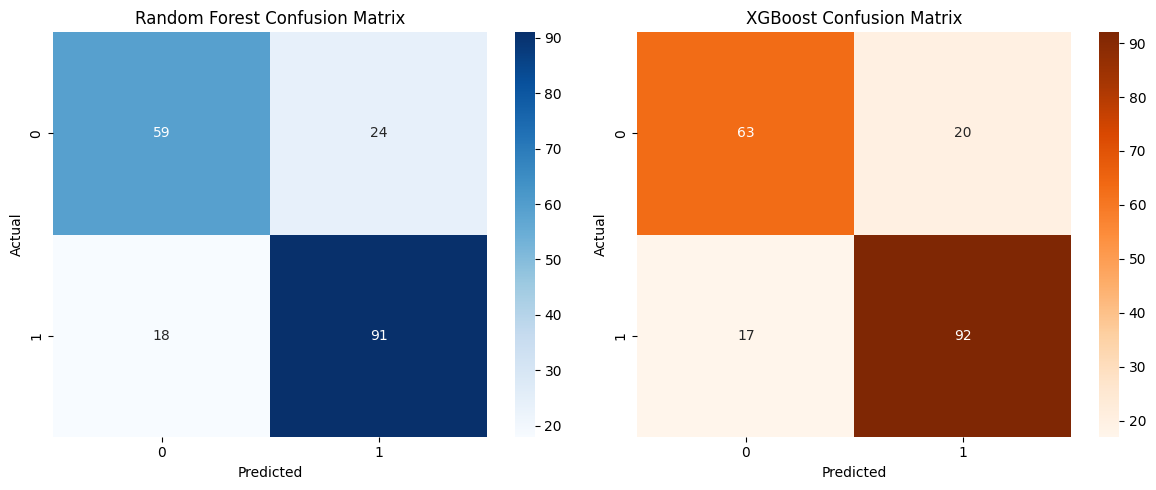

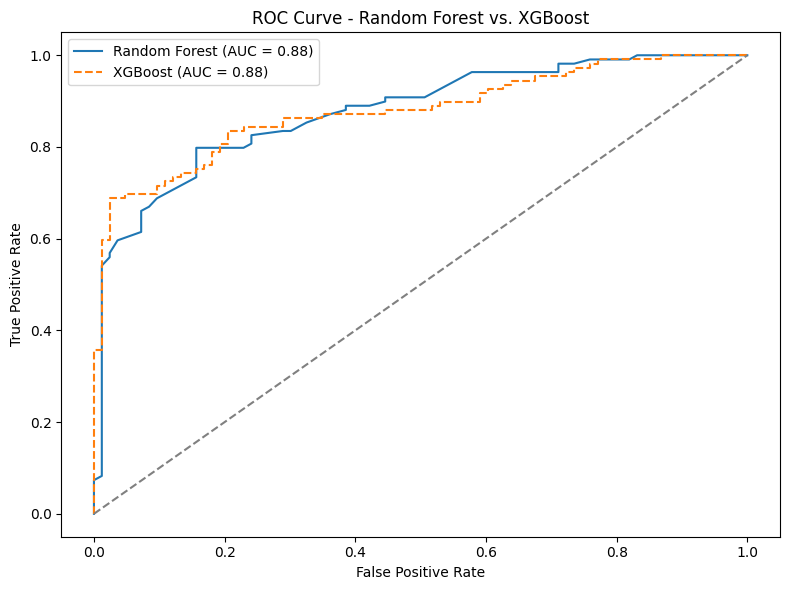

In [47]:
# fixed data leakage and changed feature selection to xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load your dataset
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# Set up cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# -------------------- RANDOM FOREST --------------------
y_true_all_rf, y_pred_all_rf, y_prob_all_rf = [], [], []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #  In-fold feature selection with XGBoost
    xgb_selector = XGBClassifier(eval_metric="logloss", random_state=42)
    xgb_selector.fit(X_train, y_train)
    top_features = pd.Series(xgb_selector.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False).head(30).index

    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    #  Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit and predict
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

    y_true_all_rf.extend(y_test)
    y_pred_all_rf.extend(y_pred)
    y_prob_all_rf.extend(y_prob)

# -------------------- XGBOOST --------------------
y_true_all_xgb, y_pred_all_xgb, y_prob_all_xgb = [], [], []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #  In-fold feature selection with XGBoost
    xgb_selector = XGBClassifier(eval_metric="logloss", random_state=42)
    xgb_selector.fit(X_train, y_train)
    top_features = pd.Series(xgb_selector.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False).head(30).index

    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    #  Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit and predict
    xgb_model = XGBClassifier(
        eval_metric="logloss",
        random_state=42,
        n_estimators=50,
        max_depth=3,
        verbosity=0
    )
    xgb_model.fit(X_train_scaled, y_train)
    y_pred = xgb_model.predict(X_test_scaled)
    y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

    y_true_all_xgb.extend(y_test)
    y_pred_all_xgb.extend(y_pred)
    y_prob_all_xgb.extend(y_prob)

# -------------------- Evaluation --------------------
# Classification reports

# Classification reports
print("\n Random Forest - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all_rf, y_pred_all_rf, digits=2))

print("\n XGBoost - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all_xgb, y_pred_all_xgb, digits=2))

# ROC-AUC Scores
auc_rf = roc_auc_score(y_true_all_rf, y_prob_all_rf)
auc_xgb = roc_auc_score(y_true_all_xgb, y_prob_all_xgb)
print(f"\nAUC (Random Forest): {auc_rf:.3f}")
print(f"AUC (XGBoost): {auc_xgb:.3f}")

# Confusion Matrices
cm_rf = confusion_matrix(y_true_all_rf, y_pred_all_rf)
cm_xgb = confusion_matrix(y_true_all_xgb, y_pred_all_xgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_true_all_rf, y_prob_all_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_true_all_xgb, y_prob_all_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest vs. XGBoost")
plt.legend()
plt.tight_layout()
plt.show()


### XG Boost and Random Forest Models Run, Using Random Forest Feature Selection, K-Fold (10)


🔍 Random Forest - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        83
           1       0.79      0.81      0.80       109

    accuracy                           0.77       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.77      0.77       192


🔍 XGBoost - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        83
           1       0.80      0.83      0.81       109

    accuracy                           0.79       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.79      0.79      0.79       192


AUC (Random Forest): 0.864
AUC (XGBoost): 0.881


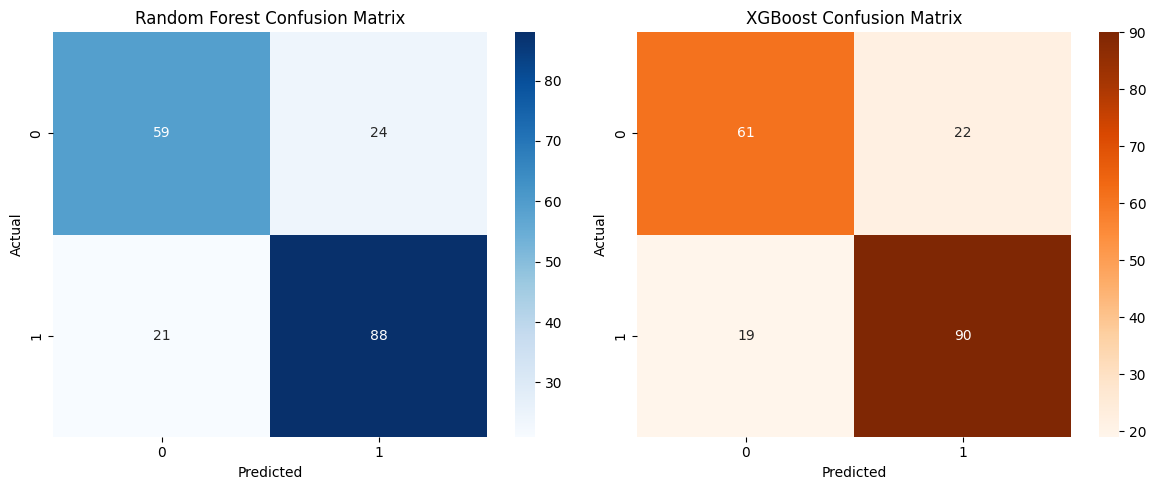

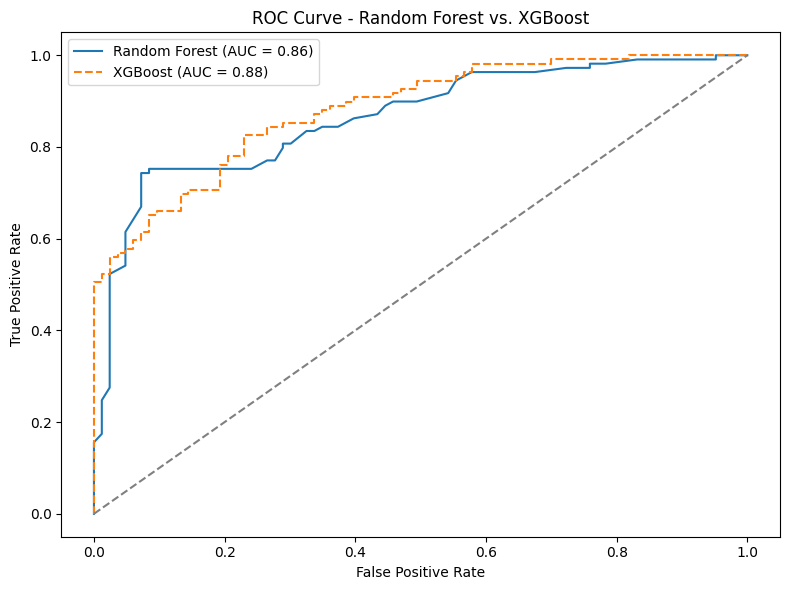

In [56]:
# updated with corrected feature selection and K-fold

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Drop target variable
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# Set up cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# -------------------- RANDOM FOREST --------------------
y_true_all_rf, y_pred_all_rf, y_prob_all_rf = [], [], []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 🎯 In-fold feature selection
    rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_selector.fit(X_train, y_train)
    top_features = pd.Series(rf_selector.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False).head(30).index

    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    # ⚖️ Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit and predict
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

    y_true_all_rf.extend(y_test)
    y_pred_all_rf.extend(y_pred)
    y_prob_all_rf.extend(y_prob)

# -------------------- XGBOOST --------------------
y_true_all_xgb, y_pred_all_xgb, y_prob_all_xgb = [], [], []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 🎯 In-fold feature selection
    rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_selector.fit(X_train, y_train)
    top_features = pd.Series(rf_selector.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False).head(30).index

    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    # ⚖️ Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit and predict
    xgb_model = XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42,
        n_estimators=50,
        max_depth=3,
        verbosity=0
    )
    xgb_model.fit(X_train_scaled, y_train)
    y_pred = xgb_model.predict(X_test_scaled)
    y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

    y_true_all_xgb.extend(y_test)
    y_pred_all_xgb.extend(y_pred)
    y_prob_all_xgb.extend(y_prob)

# -------------------- Evaluation --------------------
# Classification reports
print("\n🔍 Random Forest - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all_rf, y_pred_all_rf, digits=2))

print("\n🔍 XGBoost - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all_xgb, y_pred_all_xgb, digits=2))

# ROC-AUC Scores
auc_rf = roc_auc_score(y_true_all_rf, y_prob_all_rf)
auc_xgb = roc_auc_score(y_true_all_xgb, y_prob_all_xgb)
print(f"\nAUC (Random Forest): {auc_rf:.3f}")
print(f"AUC (XGBoost): {auc_xgb:.3f}")

# Confusion Matrices
cm_rf = confusion_matrix(y_true_all_rf, y_pred_all_rf)
cm_xgb = confusion_matrix(y_true_all_xgb, y_pred_all_xgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_true_all_rf, y_prob_all_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_true_all_xgb, y_prob_all_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest vs. XGBoost")
plt.legend()
plt.tight_layout()
plt.show()


### Reports - XG Boost Model Using XG Boost Feature Selection (Top 25 Features)

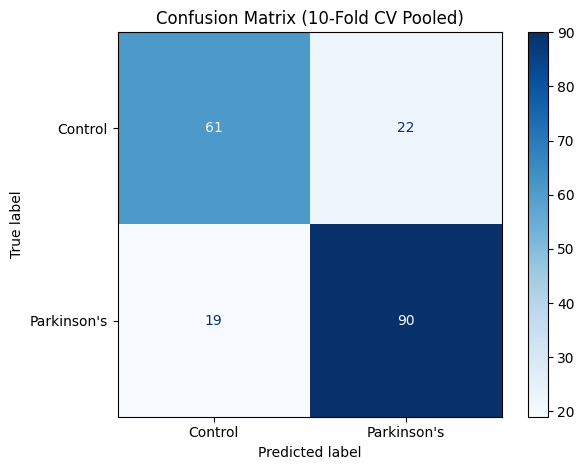

True Negatives (TN): 61
False Positives (FP): 22
False Negatives (FN): 19
True Positives (TP): 90


In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true_all_xgb, y_pred_all_xgb)

# Optional: plot as a labeled heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "Parkinson's"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (10-Fold CV Pooled)")
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


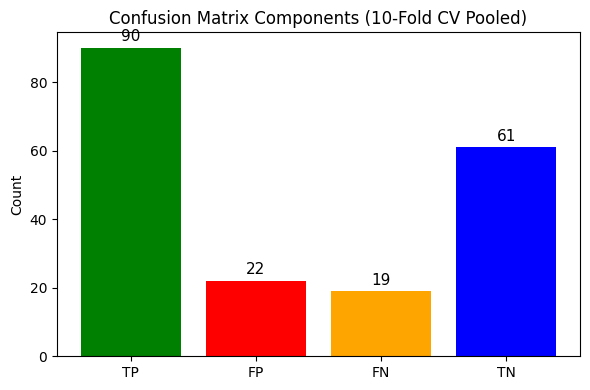

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Use pooled predictions from all folds
tn, fp, fn, tp = confusion_matrix(y_true_all_xgb, y_pred_all_xgb).ravel()

# Values and labels
labels = ["TP", "FP", "FN", "TN"]
values = [tp, fp, fn, tn]
colors = ["green", "red", "orange", "blue"]

# Plot bars
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with count
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, val + 1, str(val), ha="center", va="bottom", fontsize=11)

plt.title("Confusion Matrix Components (10-Fold CV Pooled)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Random Forest, XG Boost Models Using Random Forest Feature Selection (Top 25 Features)


🔍 Random Forest - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        83
           1       0.78      0.83      0.81       109

    accuracy                           0.78       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.78      0.78      0.77       192


🔍 XGBoost - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        83
           1       0.80      0.81      0.80       109

    accuracy                           0.78       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.78      0.78      0.78       192


AUC (Random Forest): 0.872
AUC (XGBoost): 0.875


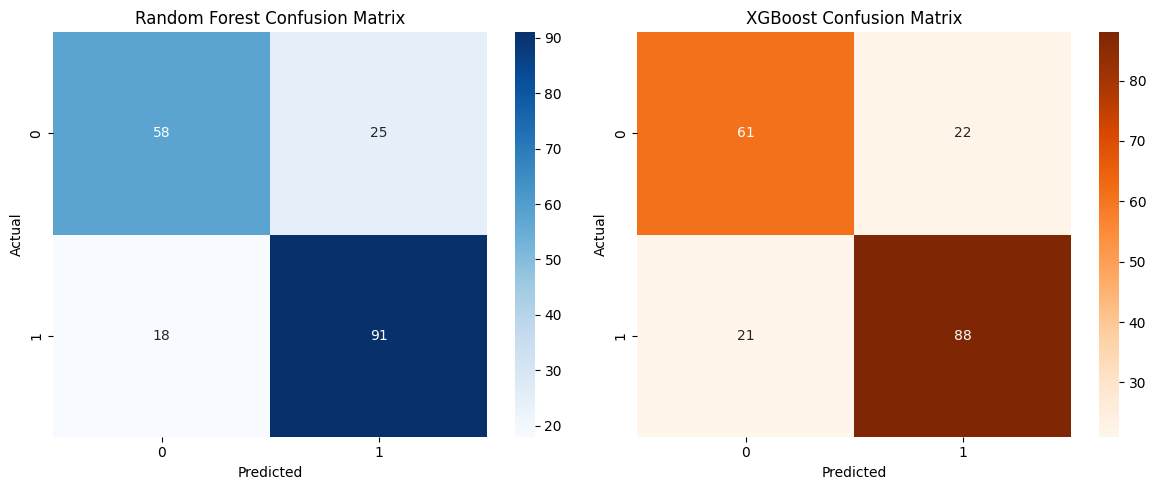

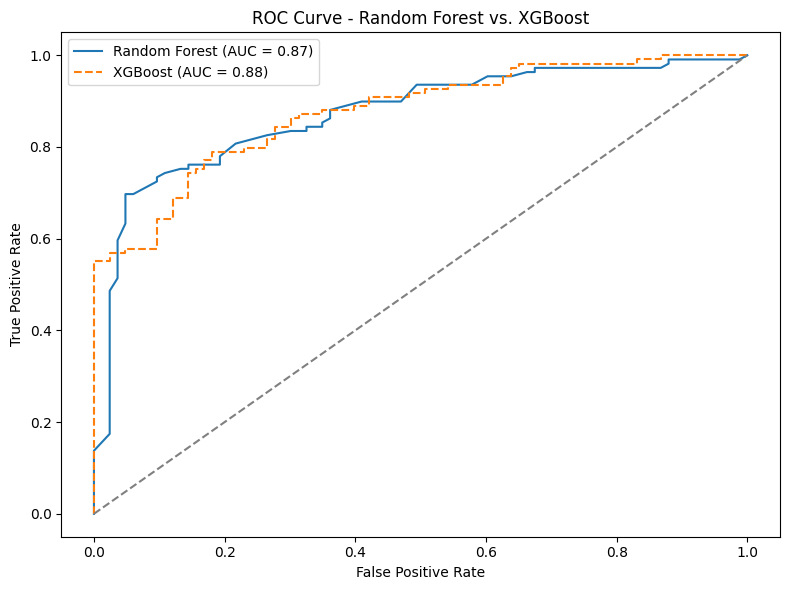

In [63]:
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# Set up cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# -------------------- RANDOM FOREST --------------------
y_true_all_rf, y_pred_all_rf, y_prob_all_rf = [], [], []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 🎯 In-fold feature selection using training data only
    rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_selector.fit(X_train, y_train)
    top_features = pd.Series(rf_selector.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False).head(25).index

    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    # ⚖️ Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit and predict
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

    y_true_all_rf.extend(y_test)
    y_pred_all_rf.extend(y_pred)
    y_prob_all_rf.extend(y_prob)

# -------------------- XGBOOST --------------------
y_true_all_xgb, y_pred_all_xgb, y_prob_all_xgb = [], [], []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 🎯 Use Random Forest feature selection from training set
    rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_selector.fit(X_train, y_train)
    top_features = pd.Series(rf_selector.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False).head(25).index

    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    # ⚖️ Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit and predict
    xgb_model = XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42,
        n_estimators=50,
        max_depth=3,
        verbosity=0
    )
    xgb_model.fit(X_train_scaled, y_train)
    y_pred = xgb_model.predict(X_test_scaled)
    y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

    y_true_all_xgb.extend(y_test)
    y_pred_all_xgb.extend(y_pred)
    y_prob_all_xgb.extend(y_prob)

# -------------------- Evaluation --------------------
print("\n🔍 Random Forest - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all_rf, y_pred_all_rf, digits=2))

print("\n🔍 XGBoost - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all_xgb, y_pred_all_xgb, digits=2))

auc_rf = roc_auc_score(y_true_all_rf, y_prob_all_rf)
auc_xgb = roc_auc_score(y_true_all_xgb, y_prob_all_xgb)
print(f"\nAUC (Random Forest): {auc_rf:.3f}")
print(f"AUC (XGBoost): {auc_xgb:.3f}")

cm_rf = confusion_matrix(y_true_all_rf, y_pred_all_rf)
cm_xgb = confusion_matrix(y_true_all_xgb, y_pred_all_xgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_true_all_rf, y_prob_all_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_true_all_xgb, y_prob_all_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest vs. XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

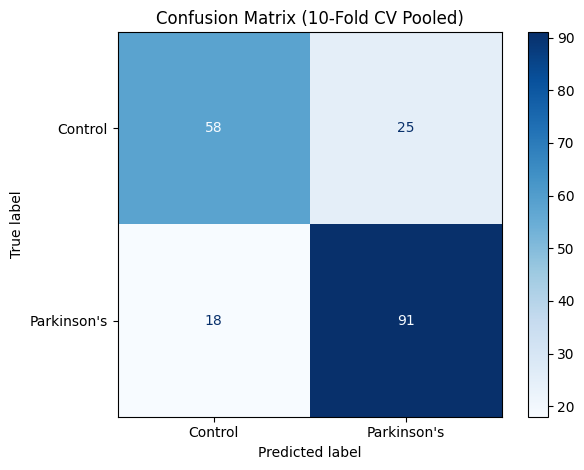

True Negatives (TN): 58
False Positives (FP): 25
False Negatives (FN): 18
True Positives (TP): 91


In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true_all_rf, y_pred_all_rf)

# Optional: plot as a labeled heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "Parkinson's"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (10-Fold CV Pooled)")
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


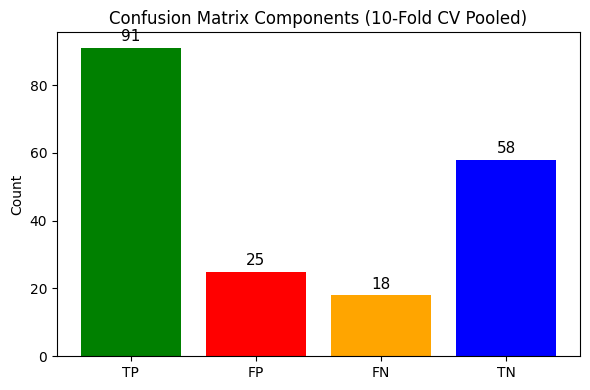

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Use pooled predictions from all folds
tn, fp, fn, tp = confusion_matrix(y_true_all_rf, y_pred_all_rf).ravel()

# Values and labels
labels = ["TP", "FP", "FN", "TN"]
values = [tp, fp, fn, tn]
colors = ["green", "red", "orange", "blue"]

# Plot bars
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with count
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, val + 1, str(val), ha="center", va="bottom", fontsize=11)

plt.title("Confusion Matrix Components (10-Fold CV Pooled)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Top 50 Statistically Relevant Features and P Values - Random Forest

<a id="section-8"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">8. Statistical Evaluation of Features</p>

In [71]:
# Drop the unused column
#BIO_df.drop(columns=['PD Diagnosis'], inplace=True)
from xgboost import XGBClassifier
from scipy.stats import mannwhitneyu
import pandas as pd

# Drop the unused column (if it exists)
if 'PD Diagnosis' in BIO_df.columns:
    BIO_df.drop(columns=['PD Diagnosis'], inplace=True)

# Step 1: Define features and target
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# Step 2: Train the XGBoost model
model = XGBClassifier(eval_metric="logloss", random_state=42)
model.fit(X, y)

# Step 3: Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)

# Step 4: Sort and get top 30 features (names)
top_features = importances.sort_values(ascending=False).head(30).index

# Mann-Whitney U test for each top feature
mw_results = []
for feature in top_features:
    group_0 = BIO_df[BIO_df["PD_LABEL"] == 0][feature]
    group_1 = BIO_df[BIO_df["PD_LABEL"] == 1][feature]
    stat, p = mannwhitneyu(group_0, group_1, alternative="two-sided")
    mw_results.append({
        "Feature": feature,
        "U-statistic": stat,
        "p-value": p
    })

# Build the DataFrame and add significance column
mw_df = pd.DataFrame(mw_results).sort_values("p-value").reset_index(drop=True)
mw_df
display(mw_df)

# Optional: set display options
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", None)


# Save to CSV
csv_path = "xg_boost_pValues.csv"
mw_df.to_csv(csv_path, index=False)



,Feature,U-statistic,p-value
0,Homovanillic_acid,1449.0,2.734494e-16
1,CCKN_HUMAN|AHLGALLAR|y6+,6049.0,6.391110e-05
2,Ornithine,3066.0,1.336619e-04
3,LIGO1_HUMAN|ATVPFPFDIK|y5+,5926.0,2.374441e-04
4,Abeta1-42,5884.5,3.615955e-04
5,NPTXR_HUMAN|LVEAFGGATK|y5+,5737.0,1.472950e-03
6,DOPAC,3356.0,2.196091e-03
7,SCG1_HUMAN|GEAGAPGEEDIQGPTK|y4+,5643.0,3.351342e-03
8,SLIK1_HUMAN|SLPVDVFAGVSLSK|y7+,5568.5,6.177213e-03
9,SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+,5329.0,3.482754e-02


### Top 50 Statistically Relevant Features and P Values - Random Forest

In [74]:
from scipy.stats import mannwhitneyu
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Separate features and target
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# Fit RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importances.head(50).index.tolist()

# Mann-Whitney U test for each top feature
mw_results = []
for feature in top_features:
    group_0 = BIO_df[BIO_df["PD_LABEL"] == 0][feature]
    group_1 = BIO_df[BIO_df["PD_LABEL"] == 1][feature]
    stat, p = mannwhitneyu(group_0, group_1, alternative="two-sided")
    mw_results.append({
        "Feature": feature,
        "U-statistic": stat,
        "p-value": p
    })

# Build the DataFrame and add significance column
mw_df = pd.DataFrame(mw_results).sort_values("p-value").reset_index(drop=True)
mw_df["Significant (p < 0.05)"] = mw_df["p-value"] < 0.05

# Display table
from IPython.display import display
display(mw_df)

# Save to CSV
csv_path = "RF_PValue_Biomarker_Table.csv"
mw_df.to_csv(csv_path, index=False)

# Optional: set display options
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", None)



,Feature,U-statistic,p-value,Significant (p < 0.05)
0,Homovanillic_acid,1449.0,2.734494e-16,True
1,LIGO1_HUMAN|ATVPFPFDIK|y7+,6185.5,1.326153e-05,True
2,N-Acetylputrescine,2997.0,6.320895e-05,True
3,CCKN_HUMAN|AHLGALLAR|y6+,6049.0,6.391110e-05,True
4,VGF_HUMAN|THLGEALAPLSK|y4+,6020.0,8.787014e-05,True
5,Ornithine,3066.0,1.336619e-04,True
6,CCKN_HUMAN|AHLGALLAR|y7+,5980.0,1.350824e-04,True
7,VGF_HUMAN|AYQGVAAPFPK|y2+,5938.0,2.098205e-04,True
8,LIGO1_HUMAN|ATVPFPFDIK|y5+,5926.0,2.374441e-04,True
9,VGF_HUMAN|AYQGVAAPFPK|y8+,5916.5,2.617024e-04,True


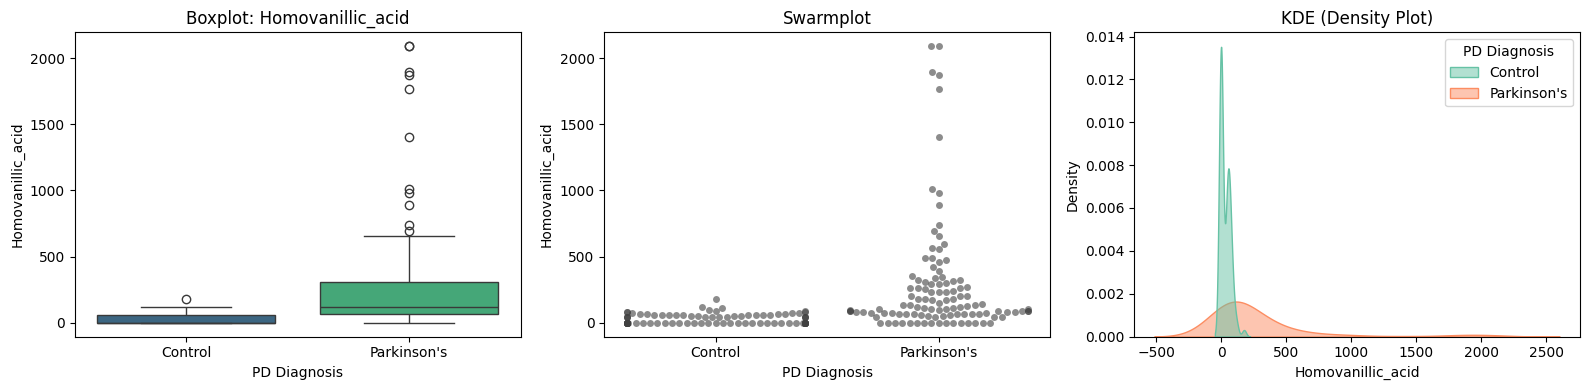

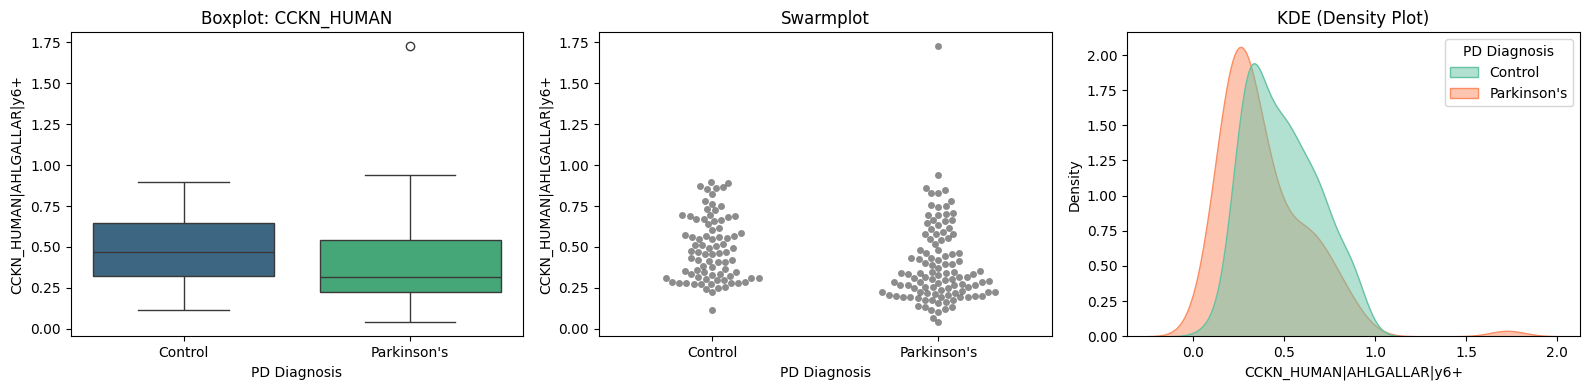

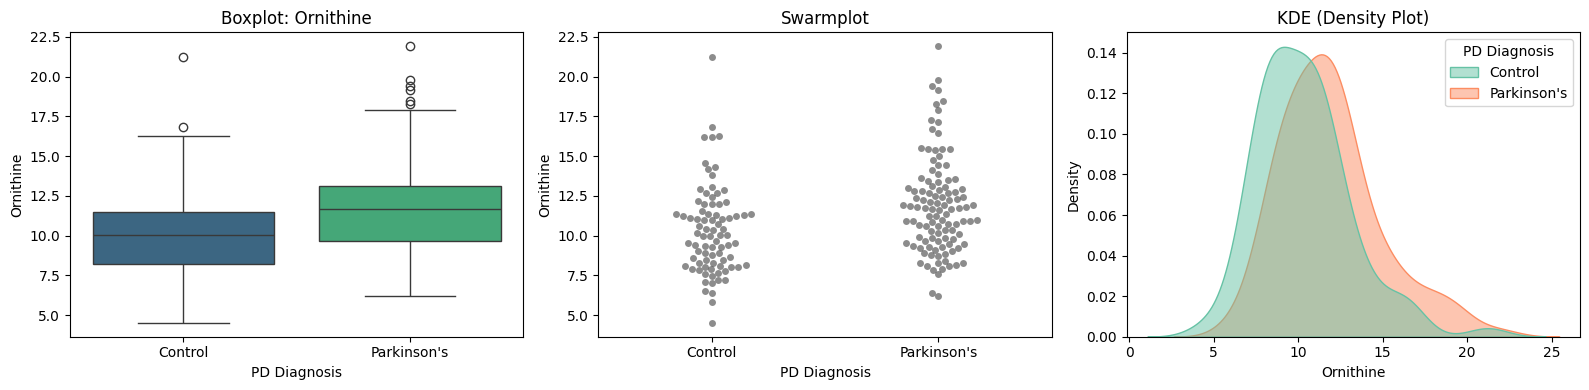

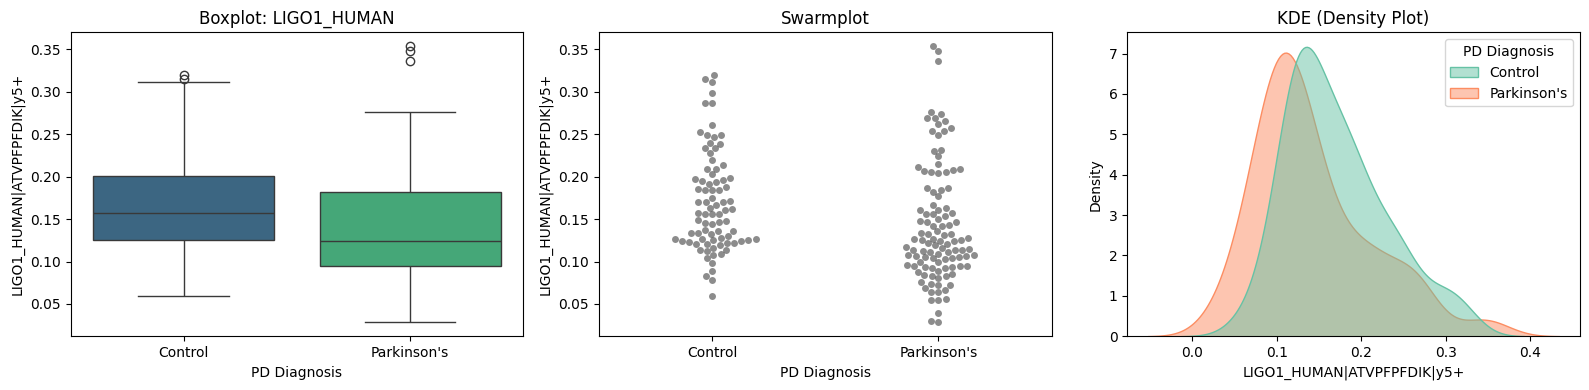

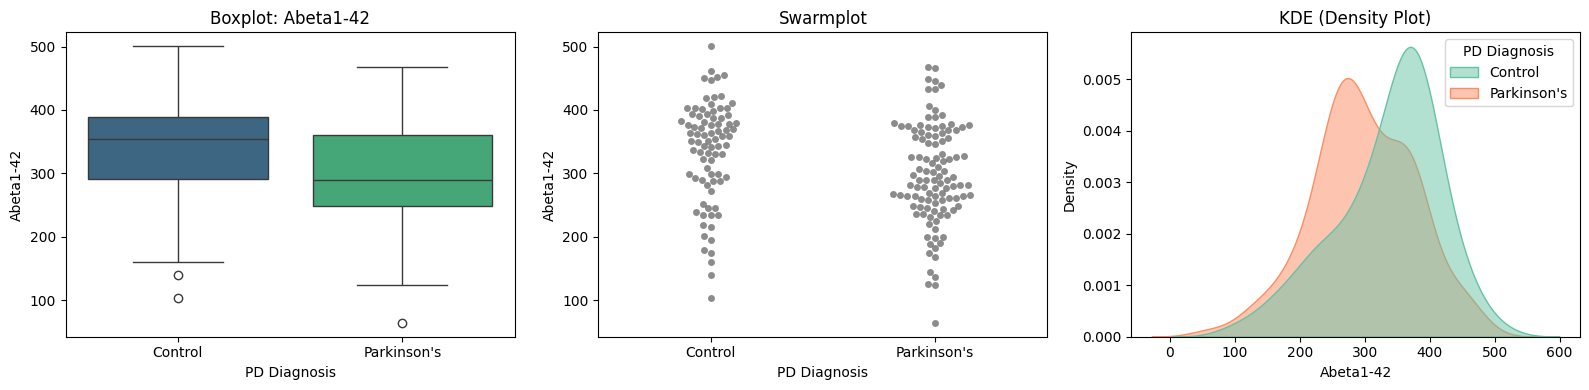

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# Top 5 significant biomarkers from your Mann-Whitney U test
top_proteins = [
    "Homovanillic_acid",
    "CCKN_HUMAN|AHLGALLAR|y6+",
    "Ornithine",
    "LIGO1_HUMAN|ATVPFPFDIK|y5+",
    "Abeta1-42"
]

# Optional: rename labels for better readability
BIO_df["PD Diagnosis"] = BIO_df["PD_LABEL"].map({0: "Control", 1: "Parkinson's"})

# Plot loop
for gene in top_proteins:
    plt.figure(figsize=(16, 4))  # keep this inside the loop

     # Drop rows with missing values in the current biomarker column
    plot_df = BIO_df.dropna(subset=[gene, "PD Diagnosis"])

    # Only plot if there are at least two groups with data
    if plot_df["PD Diagnosis"].nunique() < 2:
        print(f"Skipping {gene}: not enough groups with data.")
        plt.close()
        continue

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=BIO_df, x="PD Diagnosis", y=gene, hue="PD Diagnosis", palette="viridis", legend=False)
    plt.title(f"Boxplot: {gene.split('|')[0]}")

    # Swarmplot
    plt.subplot(1, 3, 2)
    sns.swarmplot(data=BIO_df, x="PD Diagnosis", y=gene, alpha=0.6, color=".25")
    plt.title("Swarmplot")

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(data=BIO_df, x=gene, hue="PD Diagnosis", fill=True, common_norm=False, palette="Set2", alpha=0.5)
    plt.title("KDE (Density Plot)")

    plt.tight_layout()
    plt.show()


### Threshold Analysis for Homovanillic Acid

In [79]:
# List of percentiles to evaluate
percentiles = np.arange(0, 1.01, 0.01)  # From 0% to 100% in 1% increments

# Initialize variables to track the best threshold and performance
best_percentile = None
best_threshold = None
best_auc = 0

# Create a copy of the DataFrame to avoid modifying the original
df_copy = BIO_df.copy()

# Convert SAA_Status to numeric
BIO_df["Park_Diagnosis"] = BIO_df["PD_LABEL"].map({0: "Control", 1: "Parkinson's"})

# Loop through percentiles
for percentile in percentiles:
    threshold = df_copy['Homovanillic_acid'].quantile(percentile)
    
    # Use .loc to set Predicted_SAA_Status
    df_copy.loc[:, 'Predicted_PD_Status'] = (df_copy['Homovanillic_acid'] > threshold).astype(int)
    
    # Calculate AUC and performance metrics
    auc_score = roc_auc_score(df_copy['PD_LABEL'], df_copy['Predicted_PD_Status'])
    
    # Update the best threshold if performance improves
    if auc_score > best_auc:
        best_auc = auc_score
        best_percentile = percentile
        best_threshold = threshold

# Print the results
print(f"Best Percentile: {best_percentile * 100:.2f}%")
print(f"Best Threshold (Homovanillic Acid): {best_threshold:.3f}")
print(f"Best ROC-AUC: {best_auc:.3f}")

# Check classification report for the best threshold
df_copy.loc[:, 'Predicted_PD_Status'] = (df_copy['Homovanillic_acid'] > best_threshold).astype(int)
print("\nClassification Report:")
print(classification_report(df_copy['PD_LABEL'], df_copy['Predicted_PD_Status'], digits=3))


Best Percentile: 48.00%
Best Threshold (Homovanillic Acid): 64.525
Best ROC-AUC: 0.800

Classification Report:
              precision    recall  f1-score   support

           0      0.739     0.819     0.777        83
           1      0.850     0.780     0.813       109

    accuracy                          0.797       192
   macro avg      0.795     0.800     0.795       192
weighted avg      0.802     0.797     0.798       192



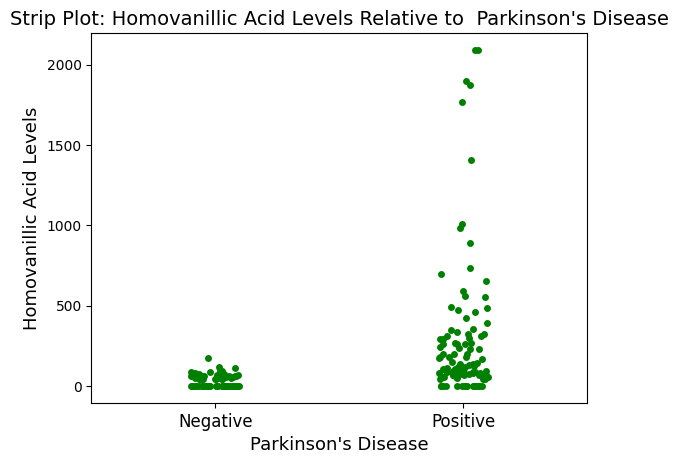

In [80]:
# Create a strip plot with filtered data
sns.stripplot(x='PD_LABEL', y='Homovanillic_acid', data=BIO_df.dropna(subset=['Homovanillic_acid']), jitter=True, color='green')

# Add labels and title
plt.xlabel("Parkinson's Disease", fontsize=13)
plt.ylabel('Homovanillic Acid Levels', fontsize=13)
plt.title("Strip Plot: Homovanillic Acid Levels Relative to  Parkinson's Disease", fontsize=14)

# Set custom labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], fontsize=12)

plt.show()


### KDE Plots for Top 5 P-Value Biomarkers as determined by XG Boost Classifier

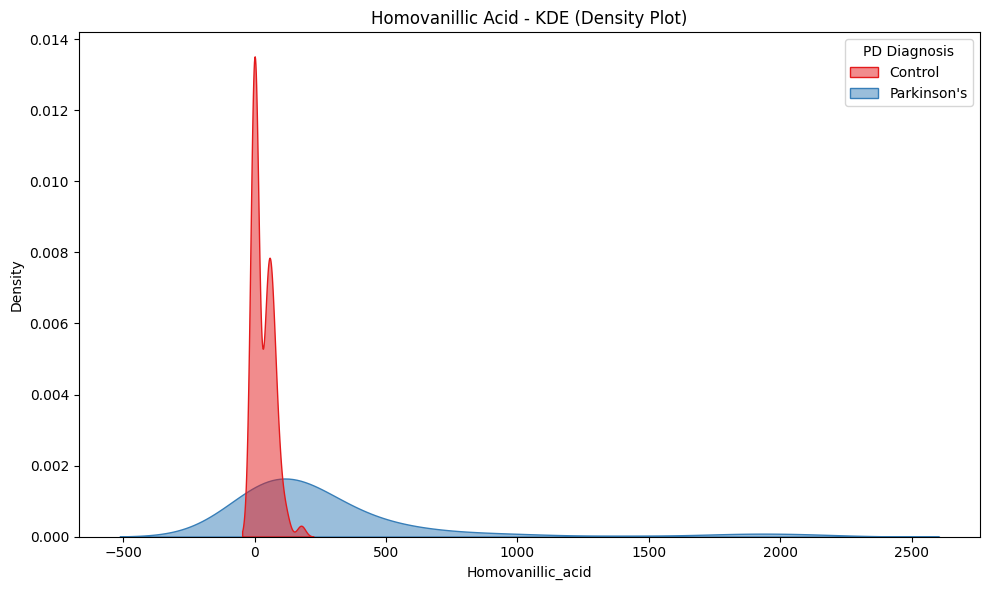

In [84]:
 # KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='Homovanillic_acid', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("Homovanillic Acid - KDE (Density Plot)")

plt.tight_layout()
plt.show()

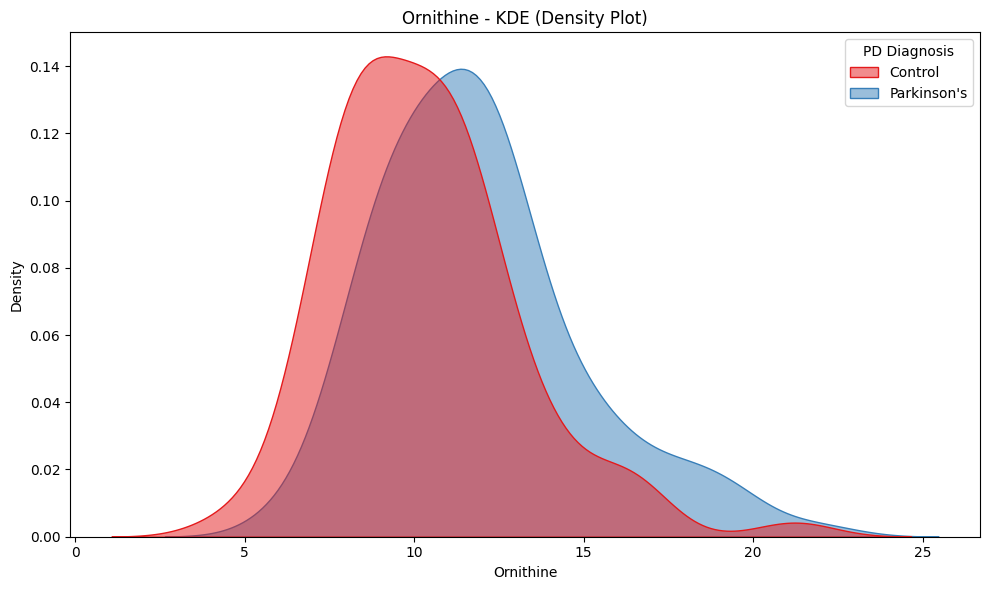

In [86]:
 # KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='Ornithine', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("Ornithine - KDE (Density Plot)")

plt.tight_layout()
plt.show()

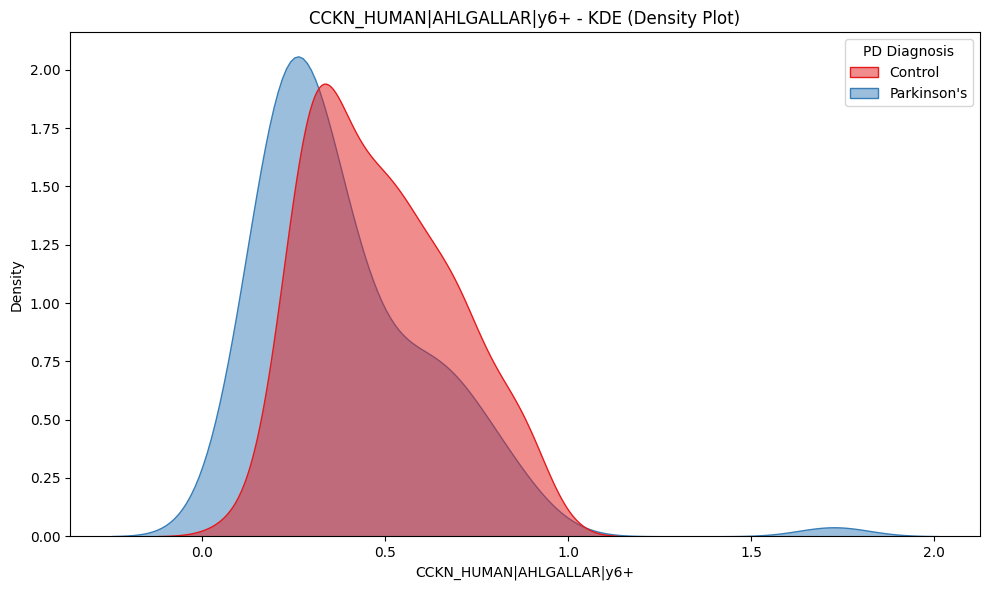

In [88]:
 # KDE plot

plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='CCKN_HUMAN|AHLGALLAR|y6+', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("CCKN_HUMAN|AHLGALLAR|y6+ - KDE (Density Plot)")

plt.tight_layout()
plt.show()

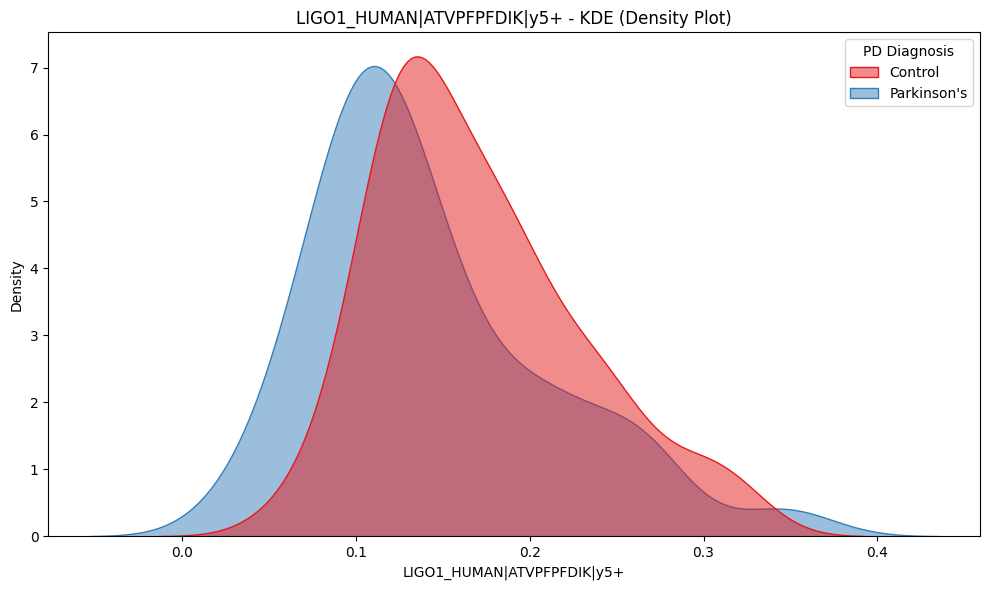

In [90]:
 # KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='LIGO1_HUMAN|ATVPFPFDIK|y5+', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("LIGO1_HUMAN|ATVPFPFDIK|y5+ - KDE (Density Plot)")

plt.tight_layout()
plt.show()

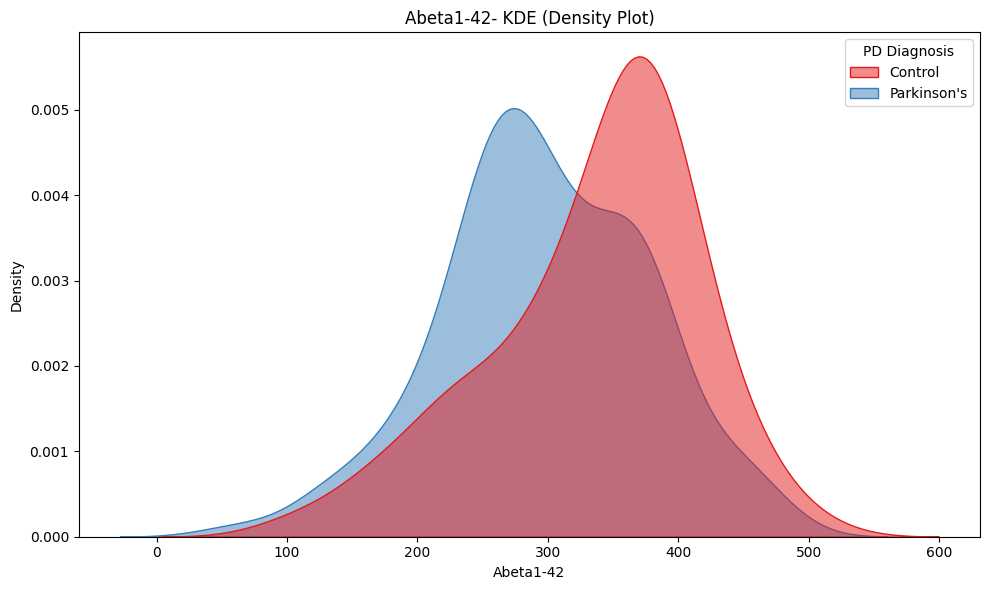

In [92]:
 # KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='Abeta1-42', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("Abeta1-42- KDE (Density Plot)")

plt.tight_layout()
plt.show()

### Top Importances List XG Boost

In [109]:
BIO_df.head()

,24(S)-hydroxycholesterol,3-Hydroxykynurenine,7a-Hydroxy-3-oxocholest-4-enoic_acid,"7a-Hydroxy-3-oxocholest-4-enoic_acid+3b,_7a-dihydroxycholest-5-enoic_acid",A1AT_HUMAN|LSITGTYDLK|y6+,A1AT_HUMAN|LSITGTYDLK|y7+,A1AT_HUMAN|SVLGQLGITK|y7+,A1AT_HUMAN|SVLGQLGITK|y8+,A1BG_HUMAN|NGVAQEPVHLDSPAIK|b3+,A1BG_HUMAN|NGVAQEPVHLDSPAIK|y5+,A1BG_HUMAN|SGLSTGWTQLSK|y7+,A1BG_HUMAN|SGLSTGWTQLSK|y8+,A2AP_HUMAN|DFLQSLK|b2+,A2AP_HUMAN|DFLQSLK|y5+,A2AP_HUMAN|LGNQEPGGQTALK|b5+,A2AP_HUMAN|LGNQEPGGQTALK|y8+,A2GL_HUMAN|DLLLPQPDLR|b3+,A2GL_HUMAN|DLLLPQPDLR|y6+,A2GL_HUMAN|VAAGAFQGLR|y7+,A2GL_HUMAN|VAAGAFQGLR|y8+,A2MG_HUMAN|NEDSLVFVQTDK|y5+,A2MG_HUMAN|NEDSLVFVQTDK|y6+,A4_HUMAN|LVFFAEDVGSNK|y8+,A4_HUMAN|LVFFAEDVGSNK|y9+,A4_HUMAN|THPHFVIPYR|b4+,A4_HUMAN|THPHFVIPYR|y4+,A4_HUMAN|VESLEQEAANER|y4+,A4_HUMAN|VESLEQEAANER|y5+,A4_HUMAN|WYFDVTEGK|y4+,A4_HUMAN|WYFDVTEGK|y7+,AACT_HUMAN|ADLSGITGAR|y6+,AACT_HUMAN|ADLSGITGAR|y7+,AACT_HUMAN|EIGELYLPK|y2+,AACT_HUMAN|EIGELYLPK|y7+,AACT_HUMAN|NLAVSQVVHK|b3+,AACT_HUMAN|NLAVSQVVHK|y8+,AATC_HUMAN|IVASTLSNPELFEEWTGNVK|y4+,AATC_HUMAN|IVASTLSNPELFEEWTGNVK|y7+,AATC_HUMAN|LALGDDSPALK|y8+,AATC_HUMAN|LALGDDSPALK|y9+,AFAM_HUMAN|DADPDTFFAK|y7+,AFAM_HUMAN|DADPDTFFAK|y8+,AFAM_HUMAN|FLVNLVK|y5+,AFAM_HUMAN|FLVNLVK|y6+,AFAM_HUMAN|LPNNVLQEK|y6+,AFAM_HUMAN|LPNNVLQEK|y7+,ALBU_HUMAN|FQNALLVR|b4+,ALBU_HUMAN|FQNALLVR|y3+,ALBU_HUMAN|LVNEVTEFAK|y3+,ALBU_HUMAN|LVNEVTEFAK|y8+,ALDOA_HUMAN|ALQASALK|y5+,ALDOA_HUMAN|ALQASALK|y6+,ALDOA_HUMAN|QLLLTADDR|b3+,ALDOA_HUMAN|QLLLTADDR|b5+,AMBP_HUMAN|AFIQLWAFDAVK|y7+,AMBP_HUMAN|AFIQLWAFDAVK|y8+,AMBP_HUMAN|ETLLQDFR|y2+,AMBP_HUMAN|ETLLQDFR|y5+,AMD_HUMAN|IPVDEEAFVIDFKPR|y4+,AMD_HUMAN|IPVDEEAFVIDFKPR|y5+,AMD_HUMAN|IVQFSPSGK|y4+,ANT3_HUMAN|DDLYVSDAFHK|y6+,ANT3_HUMAN|DDLYVSDAFHK|y7+,ANT3_HUMAN|FATTFYQHLADSK|y6+,ANT3_HUMAN|FATTFYQHLADSK|y8+,APLP2_HUMAN|HYQHVLAVDPEK|y3+,APLP2_HUMAN|HYQHVLAVDPEK|y7+,APLP2_HUMAN|WYFDLSK|y5+,APLP2_HUMAN|WYFDLSK|y6+,APOA1_HUMAN|ATEHLSTLSEK|y3+,APOA1_HUMAN|ATEHLSTLSEK|y6+,APOA1_HUMAN|DLATVYVDVLK|y6+,APOA1_HUMAN|DLATVYVDVLK|y8+,APOA1_HUMAN|DYVSQFEGSALGK|b2+,APOA1_HUMAN|DYVSQFEGSALGK|y8+,APOA1_HUMAN|EQLGPVTQEFWDNLEK|y6+,APOA1_HUMAN|EQLGPVTQEFWDNLEK|y7+,APOA1_HUMAN|LLDNWDSVTSTFSK|y5+,APOA1_HUMAN|LLDNWDSVTSTFSK|y6+,APOA1_HUMAN|QGLLPVLESFK|b3+,APOA1_HUMAN|QGLLPVLESFK|y7+,APOA1_HUMAN|THLAPYSDELR|y4+,APOA1_HUMAN|THLAPYSDELR|y5+,APOA4_HUMAN|LLPHANEVSQK|y3+,APOA4_HUMAN|LLPHANEVSQK|y7+,APOA4_HUMAN|SLAPYAQDTQEK|y7+,APOB_HUMAN|IAELSATAQEIIK|b3+,APOB_HUMAN|IAELSATAQEIIK|y9+,APOB_HUMAN|SVSLPSLDPASAK|y9+,APOC2_HUMAN|ESLSSYWESAK|y7+,APOC2_HUMAN|ESLSSYWESAK|y8+,APOC2_HUMAN|TYLPAVDEK|b2+,APOC2_HUMAN|TYLPAVDEK|y6+,APOD_HUMAN|VLNQELR|y2+,APOD_HUMAN|VLNQELR|y5+,APOE_HUMAN|AATVGSLAGQPLQER|y3+,APOE_HUMAN|AATVGSLAGQPLQER|y5+,APOE_HUMAN|LAVYQAGAR|y5+,APOE_HUMAN|LAVYQAGAR|y6+,APOE_HUMAN|LGPLVEQGR|y5+,APOE_HUMAN|LGPLVEQGR|y6+,APOL1_HUMAN|LNILNNNYK|y5+,APOL1_HUMAN|LNILNNNYK|y6+,APOL1_HUMAN|VAQELEEK|b6+,APOL1_HUMAN|VAQELEEK|y6+,APOM_HUMAN|AFLLTPR|y3+,APOM_HUMAN|AFLLTPR|y4+,Abeta1-42,Acetylcholine,Alanine,Alpha_Synuclein,Anthranilic_Acid,Arginine,Asparagine,B-Alanine,B2MG_HUMAN|VEHSDLSFSK|b5+,B2MG_HUMAN|VEHSDLSFSK|y4+,B2MG_HUMAN|VNHVTLSQPK|y2+,B2MG_HUMAN|VNHVTLSQPK|y4+,B3GN1_HUMAN|EPGEFALLR|y4+,B3GN1_HUMAN|EPGEFALLR|y5+,B3GN1_HUMAN|TALASGGVLDASGDYR|y2+,B3GN1_HUMAN|TALASGGVLDASGDYR|y8+,B3GN1_HUMAN|YEAAVPDPR|b2+,B3GN1_HUMAN|YEAAVPDPR|y2+,BASP1_HUMAN|ETPAATEAPSSTPK|y6+,BASP1_HUMAN|ETPAATEAPSSTPK|y9+,BST1_HUMAN|GFFADYEIPNLQK|b3+,BST1_HUMAN|GFFADYEIPNLQK|y5+,BTD_HUMAN|LSSGLVTAALYGR|y3+,BTD_HUMAN|LSSGLVTAALYGR|y4+,BTD_HUMAN|SHLIIAQVAK|b3+,BTD_HUMAN|SHLIIAQVAK|y8+,C1R_HUMAN|GLTLHLK|y3+,C1R_HUMAN|GLTLHLK|y4+,C1S_HUMAN|IIGGSDADIK|y4+,C1S_HUMAN|IIGGSDADIK|y9+,C1S_HUMAN|SDFSNEER|y5+,C1S_HUMAN|SDFSNEER|y6+,C1S_HUMAN|SNALDIIFQTDLTGQK|y4+,C1S_HUMAN|SNALDIIFQTDLTGQK|y7+,C1S_HUMAN|TNFDNDIALVR|y4+,C1S_HUMAN|TNFDNDIALVR|y8+,CA2D1_HUMAN|FVVTDGGITR|y7+,CA2D1_HUMAN|FVVTDGGITR|y8+,CAD13_HUMAN|DIQGSLQDIFK|y2+,CAD13_HUMAN|DIQGSLQDIFK|y8+,CAD13_HUMAN|INENTGSVSVTR|y4+,CAD13_HUMAN|YEVSSPYFK|b2+,CAD13_HUMAN|YEVSSPYFK|y7+,CADM3_HUMAN|GNPVPQQYLWEK|b3+,CA

In [121]:
import xgboost as xgb

# Drop the unused column
#BIO_df.drop(columns=['PD Diagnosis'], inplace=True)

# Define features and target, keeping only numerical columns
X = BIO_df.drop(columns=['PD_LABEL']).select_dtypes(include='number')
y = BIO_df['PD_LABEL']

# Initialize and fit XGBoost classifier
clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
clf.fit(X, y)

# Calculate feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
cumulative_importance = importances.cumsum()

# Select top features contributing to 20% cumulative importance
top_20_features = cumulative_importance[cumulative_importance <= 0.70].index

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': top_20_features,
    'Importance': importances.loc[top_20_features],
})
importance_df['Percentage'] = importance_df['Importance'] * 100
importance_df['Cumulative %'] = importance_df['Percentage'].cumsum()

# Display the importance table
print(importance_df)


                                                             Feature  \
LIGO1_HUMAN|ATVPFPFDIK|y5+                LIGO1_HUMAN|ATVPFPFDIK|y5+   
CBLN1_HUMAN|STFIAPR|y3+                      CBLN1_HUMAN|STFIAPR|y3+   
NPTXR_HUMAN|LVEAFGGATK|y5+                NPTXR_HUMAN|LVEAFGGATK|y5+   
Homovanillic_acid                                  Homovanillic_acid   
Glucose                                                      Glucose   
FIBG_HUMAN|YLQEIYNSNNQK|b4+              FIBG_HUMAN|YLQEIYNSNNQK|b4+   
24(S)-hydroxycholesterol                    24(S)-hydroxycholesterol   
Ornithine                                                  Ornithine   
APOL1_HUMAN|VAQELEEK|b6+                    APOL1_HUMAN|VAQELEEK|b6+   
CCKN_HUMAN|AHLGALLAR|y6+                    CCKN_HUMAN|AHLGALLAR|y6+   
C1S_HUMAN|SNALDIIFQTDLTGQK|y7+        C1S_HUMAN|SNALDIIFQTDLTGQK|y7+   
SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+        SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+   
SODC_HUMAN|HVGDLGNVTADK|y3+              SODC_HUMAN|HVGDLGNVTADK

In [123]:



# Define features and target, keeping only numerical columns
X = BIO_df.drop(columns=['PD_LABEL']).select_dtypes(include='number')
y = BIO_df['PD_LABEL']


# Initialize and fit XGBoost classifier
clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
clf.fit(X, y)

# Calculate feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
cumulative_importance = importances.cumsum()

# Select top features contributing to 20% cumulative importance
top_20_features = cumulative_importance[cumulative_importance <= 0.70].index

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': top_20_features,
    'Importance': importances.loc[top_20_features],
})
importance_df['Percentage'] = importance_df['Importance'] * 100
importance_df['Cumulative %'] = importance_df['Percentage'].cumsum()

# Display the importance table
print(importance_df)


                                                             Feature  \
LIGO1_HUMAN|ATVPFPFDIK|y5+                LIGO1_HUMAN|ATVPFPFDIK|y5+   
CBLN1_HUMAN|STFIAPR|y3+                      CBLN1_HUMAN|STFIAPR|y3+   
NPTXR_HUMAN|LVEAFGGATK|y5+                NPTXR_HUMAN|LVEAFGGATK|y5+   
Homovanillic_acid                                  Homovanillic_acid   
Glucose                                                      Glucose   
FIBG_HUMAN|YLQEIYNSNNQK|b4+              FIBG_HUMAN|YLQEIYNSNNQK|b4+   
24(S)-hydroxycholesterol                    24(S)-hydroxycholesterol   
Ornithine                                                  Ornithine   
APOL1_HUMAN|VAQELEEK|b6+                    APOL1_HUMAN|VAQELEEK|b6+   
CCKN_HUMAN|AHLGALLAR|y6+                    CCKN_HUMAN|AHLGALLAR|y6+   
C1S_HUMAN|SNALDIIFQTDLTGQK|y7+        C1S_HUMAN|SNALDIIFQTDLTGQK|y7+   
SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+        SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+   
SODC_HUMAN|HVGDLGNVTADK|y3+              SODC_HUMAN|HVGDLGNVTADK

### Top Importances for Random Forest Classifier

In [127]:

# Define features and target, keeping only numerical columns
X = BIO_df.drop(columns=['PD_LABEL']).select_dtypes(include='number')
y = BIO_df['PD_LABEL']


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Calculate importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
cumulative_importance = importances.cumsum()

# Select top features contributing to 80% cumulative importance
top_30_features = cumulative_importance[cumulative_importance <= 0.80].index

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': top_30_features,
    'Importance': importances.loc[top_30_features],
})
importance_df['Percentage'] = importance_df['Importance'] * 100
importance_df['Cumulative %'] = importance_df['Percentage'].cumsum()

# Display table
print(importance_df)


                                                                                              Feature  \
Homovanillic_acid                                                                   Homovanillic_acid   
G3P_HUMAN|LISWYDNEFGYSNR|y6+                                             G3P_HUMAN|LISWYDNEFGYSNR|y6+   
LIGO1_HUMAN|ATVPFPFDIK|y7+                                                 LIGO1_HUMAN|ATVPFPFDIK|y7+   
Abeta1-42                                                                                   Abeta1-42   
DOPAC                                                                                           DOPAC   
A4_HUMAN|LVFFAEDVGSNK|y9+                                                   A4_HUMAN|LVFFAEDVGSNK|y9+   
3-Hydroxykynurenine                                                               3-Hydroxykynurenine   
Putrescine                                                                                 Putrescine   
VGF_HUMAN|AYQGVAAPFPK|y8+                              

<a id="section-9"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">9. Top Biomarker Review</p>

### Creating an Annotated Top 30 Biomarker Table

In [129]:
import pandas as pd

# Manually reconstruct the data (last code block was lost on session reset)
features = [
    "Homovanillic_acid", "CCKN_HUMAN|AHLGALLAR|y6+", "Ornithine", "LIGO1_HUMAN|ATVPFPFDIK|y5+", "Abeta1-42",
    "NPTXR_HUMAN|LVEAFGGATK|y5+", "DOPAC", "SCG1_HUMAN|GEAGAPGEEDIQGPTK|y4+", "SLIK1_HUMAN|SLPVDVFAGVSLSK|y7+",
    "SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+", "24(S)-hydroxycholesterol", "Glucose", "FIBG_HUMAN|YLQEIYNSNNQK|b4+",
    "PEDF_HUMAN|DTDTGALLFIGK|y4+", "KAIN_HUMAN|WADLSGITK|y8+", "GPNMB_HUMAN|AYVPIAQVK|y6+",
    "PON1_HUMAN|IFFYDSENPPASEVLR|y8+", "APOL1_HUMAN|VAQELEEK|b6+", "COCH_HUMAN|GVISNSGGPVR|y7+",
    "SODC_HUMAN|HVGDLGNVTADK|y3+", "C1S_HUMAN|SNALDIIFQTDLTGQK|y7+", "CFAI_HUMAN|VFSLQWGEVK|y6+",
    "TRFE_HUMAN|HSTIFENLANK|y5+", "IPSP_HUMAN|AVVEVDESGTR|y3+", "CBLN1_HUMAN|STFIAPR|y3+",
    "PTGDS_HUMAN|AQGFTEDTIVFLPQTDK|y7+", "SEM7A_HUMAN|VSLAPNSR|y5+", "ITIH5_HUMAN|SYLEITPSR|y4+",
    "CYTM_HUMAN|DLSPDDPQVQK|b3+", "CFAI_HUMAN|VFSLQWGEVK|y8+"
]
mann_whitney_data = [
    [1449, 2.73E-16, True], [6049, 6.39E-05, True], [3066, 0.000134, True], [5926, 0.000237, True],
    [5884.5, 0.000362, True], [5737, 0.00147, True], [3356, 0.00220, True], [5643, 0.00335, True],
    [5568.5, 0.00618, True], [5329, 0.0348, True], [5188.5, 0.0815, False], [3867, 0.0855, False],
    [3874, 0.0888, False], [3906.5, 0.1061, False], [3929, 0.119, False], [3948.5, 0.132, False],
    [3994.5, 0.166, False], [3996, 0.167, False], [4008, 0.177, False], [4982.5, 0.229, False],
    [4091.5, 0.258, False], [4280, 0.524, False], [4756, 0.541, False], [4324, 0.602, False],
    [4330.5, 0.614, False], [4410, 0.767, False], [4411.5, 0.770, False], [4477, 0.904, False],
    [4532.5, 0.982, False], [None, None, None]
]
bio_info = {
    "Homovanillic_acid": ["Metabolite", "Major dopamine metabolite in CSF; reduced levels are consistent with dopaminergic deficits in PD.", "https://hmdb.ca/metabolites/HMDB0000072"],
    "CCKN_HUMAN|AHLGALLAR|y6+": ["Protein peptide", "Fragment of cholecystokinin; altered CCK signaling and levels reported in PD, may influence non-motor symptoms.", "https://pubmed.ncbi.nlm.nih.gov/11852259/"],
    "Ornithine": ["Metabolite", "Urea cycle intermediate; some metabolomic studies show altered ornithine in PD, linked to oxidative stress.", "https://hmdb.ca/metabolites/HMDB0000214"],
    "LIGO1_HUMAN|ATVPFPFDIK|y5+": ["Protein peptide", "Fragment of LINGO1; LINGO1 implicated in neurodegeneration, myelination and potential target for neuroprotection in PD.", "https://pubmed.ncbi.nlm.nih.gov/25028757/"],
    "Abeta1-42": ["Protein peptide", "Amyloid-beta peptide; decreased CSF levels observed in PD with dementia, classic AD marker.", "https://n.neurology.org/content/75/12/1055"],
    "NPTXR_HUMAN|LVEAFGGATK|y5+": ["Protein peptide", "Fragment of Neuronal pentraxin receptor (NPTXR); NPTXR is involved in synaptic plasticity, reduced levels linked to synaptic dysfunction in PD.", "https://pubmed.ncbi.nlm.nih.gov/28591746/"],
    "DOPAC": ["Metabolite", "Major dopamine metabolite; reduced CSF DOPAC in PD, reflects dopaminergic neuron loss.", "https://hmdb.ca/metabolites/HMDB0000729"],
    "SCG1_HUMAN|GEAGAPGEEDIQGPTK|y4+": ["Protein peptide", "Secretogranin-1 fragment; secretogranins may be altered in PD and other neurodegenerative diseases.", "https://pubmed.ncbi.nlm.nih.gov/31812809/"],
    "SLIK1_HUMAN|SLPVDVFAGVSLSK|y7+": ["Protein peptide", "SLAIN motif-containing protein 1 peptide; not specifically linked to PD but involved in neuronal microtubule regulation.", "https://www.uniprot.org/uniprotkb/Q9UPV0/entry"],
    "SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+": ["Protein peptide", "SLAIN motif-containing protein 1 peptide; not specifically linked to PD but involved in neuronal microtubule regulation.", "https://www.uniprot.org/uniprotkb/Q9UPV0/entry"],
    "24(S)-hydroxycholesterol": ["Metabolite", "Cholesterol metabolite; altered brain levels seen in PD and neurodegeneration.", "https://hmdb.ca/metabolites/HMDB0000068"],
    "Glucose": ["Metabolite", "Altered glucose metabolism reported in PD; insulin resistance and metabolic dysfunction may be comorbid.", "https://hmdb.ca/metabolites/HMDB0000122"],
    "FIBG_HUMAN|YLQEIYNSNNQK|b4+": ["Protein peptide", "Fibrinogen gamma chain peptide; inflammation and coagulation abnormalities observed in PD.", "https://www.uniprot.org/uniprotkb/P02679/entry"],
    "PEDF_HUMAN|DTDTGALLFIGK|y4+": ["Protein peptide", "Pigment epithelium-derived factor peptide; PEDF has neuroprotective roles and may be reduced in PD.", "https://www.uniprot.org/uniprotkb/P36955/entry"],
    "KAIN_HUMAN|WADLSGITK|y8+": ["Protein peptide", "Kainate receptor subunit peptide (GRIK1); glutamate signaling involved in PD pathophysiology.", "https://www.uniprot.org/uniprotkb/Q13002/entry"],
    "GPNMB_HUMAN|AYVPIAQVK|y6+": ["Protein peptide", "GPNMB (glycoprotein non-metastatic melanoma protein B) peptide; increased GPNMB expression reported in PD brain.", "https://pubmed.ncbi.nlm.nih.gov/25252981/"],
    "PON1_HUMAN|IFFYDSENPPASEVLR|y8+": ["Protein peptide", "Paraoxonase 1 fragment; PON1 involved in oxidative stress and reported to be altered in PD.", "https://pubmed.ncbi.nlm.nih.gov/26000815/"],
    "APOL1_HUMAN|VAQELEEK|b6+": ["Protein peptide", "Apolipoprotein L1 peptide; APOL1 polymorphisms linked to neurodegeneration and inflammation.", "https://www.uniprot.org/uniprotkb/O14791/entry"],
    "COCH_HUMAN|GVISNSGGPVR|y7+": ["Protein peptide", "Cochlin peptide; cochlin mutations more associated with hearing loss, not directly with PD.", "https://www.uniprot.org/uniprotkb/O43405/entry"],
    "SODC_HUMAN|HVGDLGNVTADK|y3+": ["Protein peptide", "Superoxide dismutase [Cu-Zn] (SOD1) peptide; oxidative stress and SOD1 dysregulation implicated in PD.", "https://www.uniprot.org/uniprotkb/P00441/entry"],
    "C1S_HUMAN|SNALDIIFQTDLTGQK|y7+": ["Protein peptide", "Complement C1s subcomponent peptide; complement system activation reported in PD brains.", "https://pubmed.ncbi.nlm.nih.gov/26581802/"],
    "CFAI_HUMAN|VFSLQWGEVK|y6+": ["Protein peptide", "Complement factor I peptide; regulates complement, altered complement activity and neuroinflammation implicated in PD.", "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5025680/"],
    "TRFE_HUMAN|HSTIFENLANK|y5+": ["Protein peptide", "Transferrin peptide; iron metabolism is disrupted in PD, and transferrin is an iron-binding protein.", "https://pubmed.ncbi.nlm.nih.gov/20346961/"],
    "IPSP_HUMAN|AVVEVDESGTR|y3+": ["Protein peptide", "Peptide from serine protease inhibitor; direct role in PD not established.", "https://www.uniprot.org/uniprotkb/P05120/entry"],
    "CBLN1_HUMAN|STFIAPR|y3+": ["Protein peptide", "Cerebellin-1 peptide; CBLN1 has synaptic functions, downregulated in some synucleinopathies.", "https://www.uniprot.org/uniprotkb/Q9Y692/entry"],
    "PTGDS_HUMAN|AQGFTEDTIVFLPQTDK|y7+": ["Protein peptide", "Prostaglandin-H2 D-isomerase fragment; prostaglandin pathways altered in PD.", "https://www.uniprot.org/uniprotkb/P41222/entry"],
    "SEM7A_HUMAN|VSLAPNSR|y5+": ["Protein peptide", "Semaphorin-7A peptide; semaphorins are involved in axon guidance and neuroinflammation, limited PD literature.", "https://www.uniprot.org/uniprotkb/Q92520/entry"],
    "ITIH5_HUMAN|SYLEITPSR|y4+": ["Protein peptide", "Inter-alpha-trypsin inhibitor heavy chain H5 peptide; extracellular matrix protein, not directly established in PD.", "https://www.uniprot.org/uniprotkb/Q86UX2/entry"],
    "CYTM_HUMAN|DLSPDDPQVQK|b3+": ["Protein peptide", "Cytochrome c fragment; mitochondrial dysfunction is a core feature in PD pathogenesis.", "https://www.uniprot.org/uniprotkb/P99999/entry"],
    "CFAI_HUMAN|VFSLQWGEVK|y8+": ["Protein peptide", "Complement factor I peptide; regulates complement, altered complement activity and neuroinflammation implicated in PD.", "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5025680/"]
}

method_map = {
    "Metabolite": "HPLC and GC-MS",
    "Protein peptide": "Mass spectrometry (often LC-MS/MS or targeted proteomics)"
}
manual_methods = {
    "Glucose": "Clinical Chemistry Analyzer",
    "Abeta1-42": "ELISA/Simoa/Immunoassay or Mass spectrometry",
    "GPNMB_HUMAN|AYVPIAQVK|y6+": "ELISA/Simoa/Immunoassay or Mass spectrometry",
    "Homovanillic_acid": "HPLC and GC-MS",
    "DOPAC": "HPLC and GC-MS",
    "24(S)-hydroxycholesterol": "HPLC and GC-MS",
    "Ornithine": "HPLC and GC-MS",
}

rows = []
for i, feat in enumerate(features):
    u, p, sig = mann_whitney_data[i]
    cat, exp, ref = bio_info.get(feat, ["", "", ""])
    if feat in manual_methods:
        meth = manual_methods[feat]
    elif cat in method_map:
        meth = method_map[cat]
    else:
        meth = ""
    rows.append([feat, cat, u, p, sig, exp, ref, meth])

export_cols = [
    "Feature", "Category", "U-statistic", "p-value", "Significant (p < 0.05)",
    "PD Association / Explanation", "Reference", "Measurement Method"
]
final_df = pd.DataFrame(rows, columns=export_cols)
final_df.to_csv("Biomarker_MannWhitney_PDAssociation_Measurement_FINAL.csv", index=False)
final_df.head(10)


,Feature,Category,U-statistic,p-value,Significant (p < 0.05),PD Association / Explanation,Reference,Measurement Method
0,Homovanillic_acid,Metabolite,1449.0,2.730000e-16,True,Major dopamine metabolite in CSF; reduced leve...,https://hmdb.ca/metabolites/HMDB0000072,HPLC and GC-MS
1,CCKN_HUMAN|AHLGALLAR|y6+,Protein peptide,6049.0,6.390000e-05,True,Fragment of cholecystokinin; altered CCK signa...,https://pubmed.ncbi.nlm.nih.gov/11852259/,Mass spectrometry (often LC-MS/MS or targeted ...
2,Ornithine,Metabolite,3066.0,1.340000e-04,True,Urea cycle intermediate; some metabolomic stud...,https://hmdb.ca/metabolites/HMDB0000214,HPLC and GC-MS
3,LIGO1_HUMAN|ATVPFPFDIK|y5+,Protein peptide,5926.0,2.370000e-04,True,Fragment of LINGO1; LINGO1 implicated in neuro...,https://pubmed.ncbi.nlm.nih.gov/25028757/,Mass spectrometry (often LC-MS/MS or targeted ...
4,Abeta1-42,Protein peptide,5884.5,3.620000e-04,True,Amyloid-beta peptide; decreased CSF levels obs...,https://n.neurology.org/content/75/12/1055,ELISA/Simoa/Immunoassay or Mass spectrometry
5,NPTXR_HUMAN|LVEAFGGATK|y5+,Protein peptide,5737.0,1.470000e-03,True,Fragment of Neuronal pentraxin receptor (NPTXR...,https://pubmed.ncbi.nlm.nih.gov/28591746/,Mass spectrometry (often LC-MS/MS or targeted ...
6,DOPAC,Metabolite,3356.0,2.200000e-03,True,Major dopamine metabolite; reduced CSF DOPAC i...,https://hmdb.ca/metabolites/HMDB0000729,HPLC and GC-MS
7,SCG1_HUMAN|GEAGAPGEEDIQGPTK|y4+,Protein peptide,5643.0,3.350000e-03,True,Secretogranin-1 fragment; secretogranins may b...,https://pubmed.ncbi.nlm.nih.gov/31812809/,Mass spectrometry (often LC-MS/MS or targeted ...
8,SLIK1_HUMAN|SLPVDVFAGVSLSK|y7+,Protein peptide,5568.5,6.180000e-03,True,SLAIN motif-containing protein 1 peptide; not ...,https://www.uniprot.org/uniprotkb/Q9UPV0/entry,Mass spectrometry (often LC-MS/MS or targeted ...
9,SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+,Protein peptide,5329.0,3.480000e-02,True,SLAIN motif-containing protein 1 peptide; not ...,https://www.uniprot.org/uniprotkb/Q9UPV0/entry,Mass spectrometry (often LC-MS/MS or targeted ...


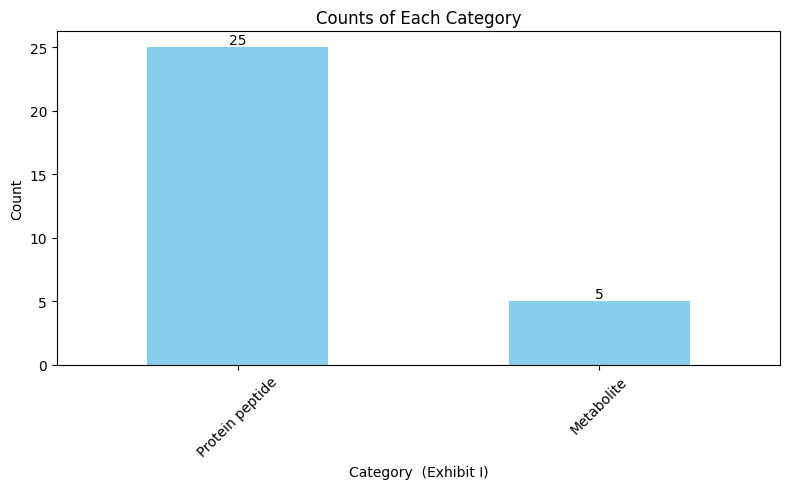

In [131]:

df = pd.read_csv('Appendix_A_Complete.csv')

# ---- 1. Value counts for the 'Category' column ----
plt.figure(figsize=(8, 5))
ax = df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Each Category')
plt.xlabel('Category  (Exhibit I)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


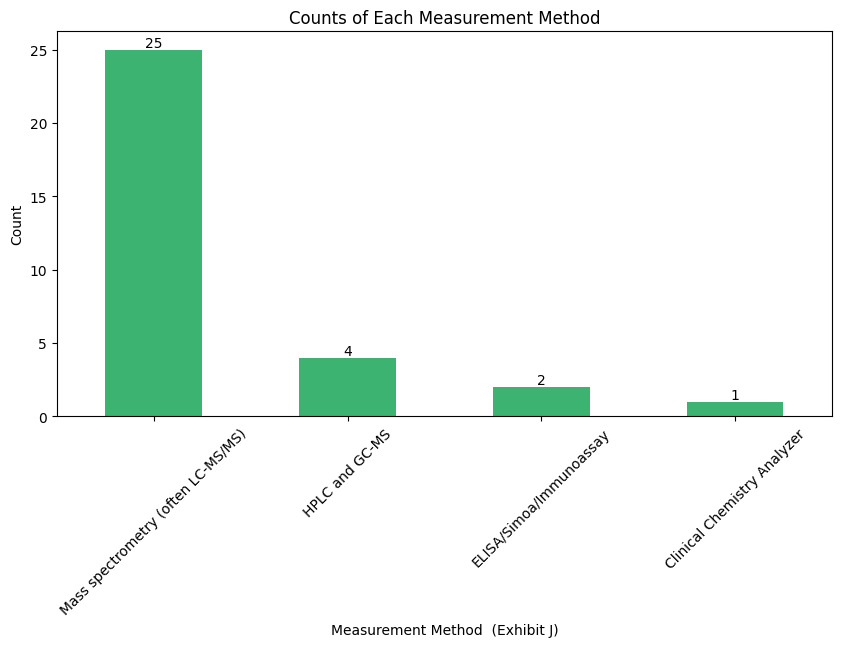

In [133]:
df = pd.read_csv('Appendix_Aa_Complete.csv')

plt.figure(figsize=(10, 5))
ax2 = df['Measurement Method'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Counts of Each Measurement Method')
plt.xlabel('Measurement Method  (Exhibit J)')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Add count labels on top of each bar
for p in ax2.patches:
    ax2.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.show()
